# Get QSO data - summary

In [1]:
# Imports
import os
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

## Get SDSS DR7 QSO Summary data

The data is located at https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html 

In [5]:
path = os.getcwd()
file_path = os.path.join(path, "DB_QSO_S82.dat.gz")
if not os.path.exists(file_path):
    # Get the quasar catalog - it gets saved in the same directory as the notebook 
    url = "https://faculty.washington.edu/ivezic/macleod/qso_dr7/DB_QSO_S82.dat.gz"
    os.system(f'wget {url}')   

In [6]:
# we know the column meaning from 
# https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_DB.html
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
SDSS_DB_QSO = Table.read(file_path, format='ascii', names = colnames)

In [7]:
SDSS_DB_QSO.sort('g')

In [8]:
m = SDSS_DB_QSO['g']>0
SDSS_DB_QSO[m]

dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1992659,39.845314,-0.022107,6108,-25.11,-25.436,0.2616,0.0,0.0,15.547,15.515,15.443,15.438,15.139,0.149
3977727,357.983826,-1.153706,77125,-24.222,-24.295,0.174,9.108,45.745,15.687,15.771,15.787,15.368,15.574,0.14
3087679,47.615932,-0.830766,7232,-22.441,-22.361,0.0802,7.791,45.049,16.15,15.951,15.802,15.459,15.575,0.335
604284,15.60966,-0.651279,2418,-24.694,-25.123,0.2942,0.0,0.0,16.125,16.114,15.996,16.148,15.765,0.187
1252652,27.427135,0.250477,4190,-26.073,-26.575,0.5521,0.0,46.628,16.667,16.36,16.427,16.291,16.419,0.205
254227,13.023189,0.593945,2042,-25.624,-25.941,0.3995,0.0,0.0,16.918,16.392,16.129,15.925,15.625,0.124
2527410,44.906113,0.626771,6871,-26.097,-26.552,0.5337,0.0,46.642,16.714,16.479,16.45,16.286,16.386,0.454
1340680,25.0711,-0.834172,3828,-24.552,-25.369,0.3342,9.051,46.107,16.454,16.502,16.449,16.582,15.769,0.157
490357,348.351898,0.579041,75802,-29.563,-30.062,2.0841,0.0,47.895,16.657,16.529,16.208,15.984,15.767,0.227


## Get SDSS DR7 QSO Light Curve data

The data is located at https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html 


In [10]:
url = "https://faculty.washington.edu/ivezic/macleod/qso_dr7/QSO_S82.tar.gz"
fpath = os.path.join(os.getcwd(), "QSO_S82.tar.gz")
if not os.path.exists(fpath):
    os.system(f'wget {url}')  

Unpack the light curves...https://www.geeksforgeeks.org/tar-command-linux-examples/

In [ ]:
! tar xvzf QSO_S82.tar.gz

Confirm that all the light curves are there ...

In [11]:
assert len(os.listdir("QSO_S82")) == 9258

## Get the PS1 QSO data 

All the code needed to execute the SQL query is in https://github.com/suberlak/PS1_SDSS_CRTS/blob/master/code2/Get_PS1_DR2_Quasar_data.ipynb 
    
However, instead of obtaining data for all 9258 objects, it suffices to get the data only for the CLQSO candidates from the paper.
    
The table of candidates can be downloaded from https://iopscience.iop.org/0004-637X/907/2/96/suppdata/apjabc698t5_ascii.txt?doi=10.3847/1538-4357/abc698. I copy-paste the text into a text file (in the github repo) called "CLQSO_candidates.txt"

In [12]:
colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
            'f_Edd','Delta(mag)',
            'Delta(sigma_G)', 'MedianPS1']
clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                   names=colnames)

In [13]:
clqso[:5]

dbID,SDSSJID,ra,dec,Redshift,log10_Lbol,log10_MBH,f_Edd,Delta(mag),Delta(sigma_G),MedianPS1
str9,str18,float64,float64,float64,float64,str4,str5,float64,float64,float64
123909,001626.54+003632.4,4.111,0.609,3.24,46.57,9.47,-1.0,-0.29,-0.054,20.48
8442,001731.70+004910.1,4.382,0.819,2.43,46.61,9.09,-0.58,-0.36,-0.107,20.36
4069419,003359.39+000230.0,8.497,0.042,1.64,45.95,9.05,-1.21,0.22,0.017,20.2
221006,005142.20+002129.0,12.926,0.358,1.55,45.95,8.24,-0.39,0.21,-0.01,19.97
257776,005513.15-005621.2,13.805,-0.939,3.61,47.13,9.58,-0.54,-0.32,-0.242,19.53


Besides, it turns out there's now an improved interface to PS1 DR2: https://catalogs.mast.stsci.edu/panstarrs/

All one needs to do is to use the "Crossmatch a List of Targets " option, uploading a csv file with columns "target ra dec"(where "target") is any object name we choose for convenience).

So lets make one:

In [10]:
clqso[['dbID','ra','dec']].write('CLQSO_candidates_ra_dec.tbl', format='ipac',
                                names=('target','ra','dec'),
                                overwrite=True)

In [42]:
clqso[['dbID','ra','dec']].write('CLQSO_candidates_ra_dec.csv', format='csv',
                                names=('target','ra','dec'),
                                overwrite=True)

"Forced mean object", and "Detections" are two tables worth checking. 

I get 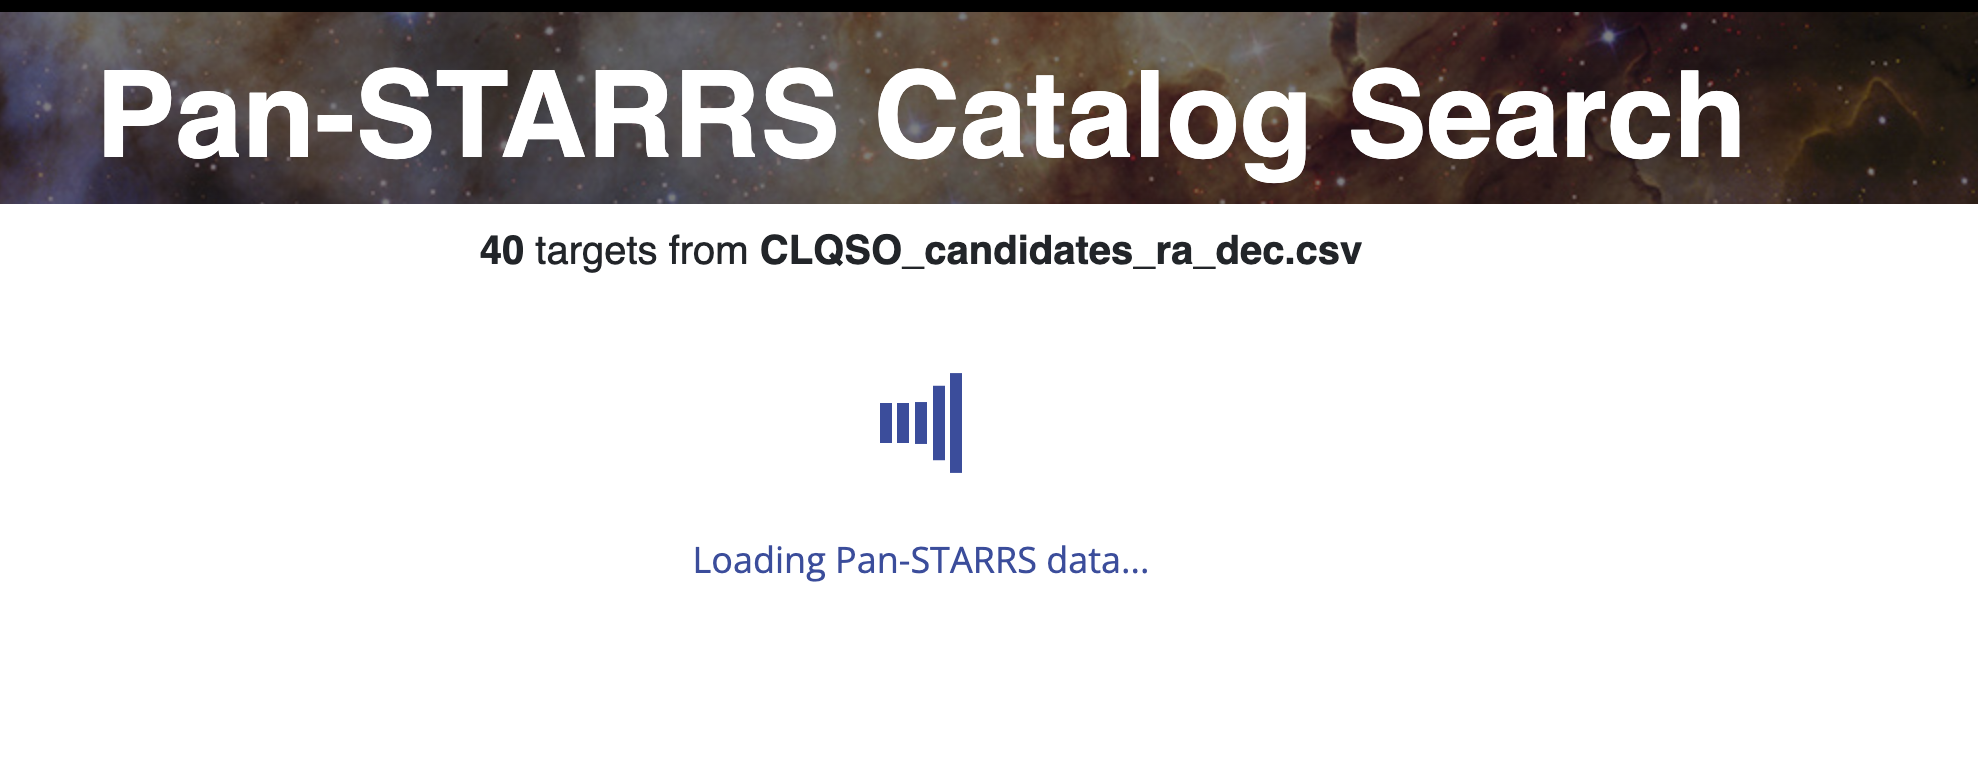

I save the table as CSV file `CLQSO_candidates_PS1_DR2.csv`:

In [23]:
import os

ps1 = Table.read('CLQSO_candidates_PS1_DR2.csv', format='csv')

In [62]:
ps1[:3]

_ra_,_dec_,_searchID_,MatchID,MatchRA,MatchDEC,dstArcSec,objName,objAltName1,objAltName2,objAltName3,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,tessID,projectionID,skyCellID,randomID,batchID,dvoRegionID,processingVersion,objInfoFlag,qualityFlag,raStack,decStack,raStackErr,decStackErr,raMeanErr,decMeanErr,epochMean,posMeanChisq,cx,cy,cz,lambda,beta,l,b,nStackObjectRows,nStackDetections,nDetections,ng,nr,ni,nz,ny,gQfPerfect,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagStd,gMeanPSFMagNpt,gMeanPSFMagMin,gMeanPSFMagMax,gMeanKronMag,gMeanKronMagErr,gMeanKronMagStd,gMeanKronMagNpt,gMeanApMag,gMeanApMagErr,gMeanApMagStd,gMeanApMagNpt,gFlags,rQfPerfect,rMeanPSFMag,rMeanPSFMagErr,rMeanPSFMagStd,rMeanPSFMagNpt,rMeanPSFMagMin,rMeanPSFMagMax,rMeanKronMag,rMeanKronMagErr,rMeanKronMagStd,rMeanKronMagNpt,rMeanApMag,rMeanApMagErr,rMeanApMagStd,rMeanApMagNpt,rFlags,iQfPerfect,iMeanPSFMag,iMeanPSFMagErr,iMeanPSFMagStd,iMeanPSFMagNpt,iMeanPSFMagMin,iMeanPSFMagMax,iMeanKronMag,iMeanKronMagErr,iMeanKronMagStd,iMeanKronMagNpt,iMeanApMag,iMeanApMagErr,iMeanApMagStd,iMeanApMagNpt,iFlags,zQfPerfect,zMeanPSFMag,zMeanPSFMagErr,zMeanPSFMagStd,zMeanPSFMagNpt,zMeanPSFMagMin,zMeanPSFMagMax,zMeanKronMag,zMeanKronMagErr,zMeanKronMagStd,zMeanKronMagNpt,zMeanApMag,zMeanApMagErr,zMeanApMagStd,zMeanApMagNpt,zFlags,yQfPerfect,yMeanPSFMag,yMeanPSFMagErr,yMeanPSFMagStd,yMeanPSFMagNpt,yMeanPSFMagMin,yMeanPSFMagMax,yMeanKronMag,yMeanKronMagErr,yMeanKronMagStd,yMeanKronMagNpt,yMeanApMag,yMeanApMagErr,yMeanApMagStd,yMeanApMagNpt,yFlags,uniquePspsP2id,detectID,filterID,imageID,randomDetID,obsTime,xPos,yPos,xPosErr,yPosErr,pltScale,posAngle,ra,dec,raErr,decErr,extNSigma,zp,telluricExt,expTime,airMass,psfFlux,psfFluxErr,psfMajorFWHM,psfMinorFWHM,psfTheta,psfCore,psfQf,psfQfPerfect,psfChiSq,psfLikelihood,momentXX,momentXY,momentYY,momentR1,momentRH,momentM3C,momentM3S,momentM4C,momentM4S,apFlux,apFluxErr,apFillF,apRadius,kronFlux,kronFluxErr,kronRad,sky,skyErr,infoFlag,infoFlag2,infoFlag3,mag,magerr
float64,float64,int64,int64,float64,float64,float64,str21,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64
17.05,-0.088,5,107890170499734957,17.05000551,-0.0879278,0.25856791058118606,PSO J017.0500-00.0879,-999,-999,-999,3492271000046739,362971981198995,0,8831540672094,10789,1,1236,92,0.860817087684588,3492271,84511,3,436527256,52,17.0499639,-0.087881,0.0010000000474974513,0.0010000000474974513,0.009990000165998936,0.010300000198185444,56098.67769676,0.8784999847412109,0.9560480954304549,0.2932058732999675,-0.0015346290116704962,15.681541285922487,-6.778917690952037,132.0874168627157,-62.661330414097314,-999,5,69,14,13,20,13,9,0.9993240237236023,20.83329963684082,0.049421001225709915,0.25181299448013306,11,20.702899932861328,21.382999420166016,20.941699981689453,0.06

Show which filters are available:

In [26]:
import numpy as np
np.unique(ps1['filterID'])

1
2
3
4
5


Here '12345' stands for `grizy` for PS1.  So to see only `r`-band data we select `filterId`=`2`:

In [39]:
idCols = [name  for name in ps1.colnames  if 'ID' in name]

Unfortunately the `searchString` somehow didn't get saved in the downloaded CSV table. Thus we need to find out which object this corresponds to by _ra, _dec.  If they're unique, we'll just use "_ra"  as object identifier

In [46]:
len(np.unique(clqso['ra']))

40

Ok, so since all 'ra' are unique, we can use them instead of 'dbId' for object identifier. Make sure same 'ra' are in the PS1 catalog:

In [50]:
len(np.unique(ps1['_ra_']))

40

In [51]:
np.sum(np.in1d(np.unique(ps1['_ra_']), np.unique(clqso['ra'])))

40

Ok, so all `_ra_` values in PS1 table are same as `ra` in clqso table. 

Convert `psfFlux` to magnitudes:

In [5]:
def flux2absigma(flux, fluxsigma):
    """Compute AB mag sigma given flux and flux sigma

    Here units of flux,  fluxsigma  don't matter 
    as long as they are consistent, since we are dividing 
    one by the other, so all the units cancel out.
    """
    FIVE_OVER_2LOG10 = 1.085736204758129569
    return FIVE_OVER_2LOG10 * fluxsigma / flux;


def flux2ab(flux, unit = 'Jy'):
    """Compute AB mag given flux. 

    Accept two unit types :  
    *  'cgs', meaning flux is in  ergs / s / Hz / cm2
    *  'Jy', meaning flux is in Jy.  1 Jy = 1E-23 * ergs/s/Hz/cm2
    """
    if unit == 'Jy':
        return -2.5 * np.log10(flux) + 8.90
    elif unit == 'cgs':
        return -2.5 * np.log10(flux) - 48.6

From https://outerspace.stsci.edu/display/PANSTARRS/PS1+Detection+table+fields I find that units of `psfFLux` are Janskys.

In [55]:
ps1['mag'] = flux2ab(ps1['psfFlux'])
ps1['magerr'] = flux2absigma(ps1['psfFlux'], ps1['psfFluxErr'])

/var/folders/y_/cnss5hqs3nz9dv_dd28yzt040000gq/T/ipykernel_43852/2050886779.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return FIVE_OVER_2LOG10 * fluxsigma / flux;


Show light curve for a particular object in a clqso table:

In [58]:
clqso[0]['ra']

4.111

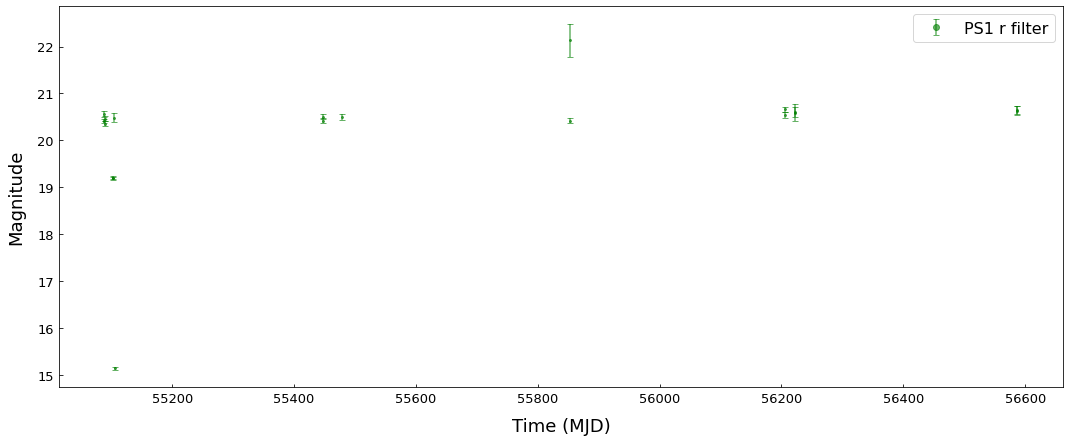

In [64]:
# select only  rows for that object
mask_object = ps1['_ra_'] == clqso[0]['ra']

# plot the light curve in r-band 
mask_filter = ps1['filterID'] == 2 

# combine the masks
mask = mask_object * mask_filter

# plot the figure
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot()

lc = ps1[mask]
ax.errorbar(lc['obsTime'], lc['mag'], yerr= lc['magerr'], 
            fmt='go', markersize=2,alpha=0.6,capsize=3, label='PS1 r filter')
ax.set_xlabel('Time (MJD)',fontsize = 18, labelpad=12)
ax.set_ylabel('Magnitude',fontsize = 18,labelpad=12)
ax.tick_params(direction='in', pad = 5, labelsize=13)
ax.legend(fontsize=16, markerscale=3)

In [ ]:
ps1[mask]


## Get the ZTF data 

The ZTF data https://www.ztf.caltech.edu/ztf-public-releases.html  can be downloaded using the `wget`-based function written by Paula Sanchez-Saez here https://github.com/LSST-sersag/dle/blob/main/activities/workshop/T2_Photometric_Reverberation_Mapping/Tutorial%202_PhotoRM_IJ.ipynb . I modify it to do just the downloading, because I prefer to read the files with astropy:

In [236]:
colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
            'f_Edd','Delta(mag)',
            'Delta(sigma_G)', 'MedianPS1']
clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                   names=colnames)

In [2]:
import pandas as pd
def get_ZTF_DR_lc(name, ra, dec, band, dr_path, keep_all_columns = False):
    
    """
    Author: Paula Sánchez Sáez, PhD
    
    Function to dowload an individual ZTF light curve using the ZTF API. 
    For more details about ZTF service, go to their documentation:
    https://irsa.ipac.caltech.edu/data/ZTF/docs/releases/dr08/ztf_release_notes_dr08.pdf 
    See section "iii. Querying Lightcurves using the API."
    
    Parameters:
    -----------
    name: str
        Object name (e.g. the object "SDSS J005132.94+180120.5" should be 
        refered here only by "J005132.94+180120.5")
    ra: float
        Right ascension of the object (in degrees).
    dec: float
        Declination of the object (in degrees).
    band: {'g', 'r', 'i'}
        ZTF photometric band.
    dr_path: str
        Path to the download directory.
    keep_all_columns: bool, default=False
        If False, only the most important light curve parameters will be retrieved. 
        Otherwise, keep all the columns.
        
    Returns:
    --------
    df: pd.DataFrame
        DataFrame containing the measurments of the retrieved light curve.
    """
    
    # make up a convenient filename
    fname = f'{name}_ZTF_{band}.csv'
    
    # don't download if the file already exists
    if os.path.exists(fname): 
        print(f'File {fname} already exists')
        
    else:
        file_path = os.path.join(dr_path, fname)
        irsa_path = "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves"
        url = f"{irsa_path}?POS=CIRCLE {ra} {dec} 0.000277778&BANDNAME={band}&FORMAT=csv&NOBS_MIN=3"
        cmd = f'wget -O {file_path} '+ f'"{url}"' 
        print(cmd)
        os.system(cmd)  
   

To make it work notice that  ZTF expects object name to have "J0016...", so we add that:

In [5]:
clqso["SDSSJID2"] = ["J"+name for name in clqso["SDSSJID"]]

Download all available ZTF data for CLQSO candidates:

In [6]:
# make a directory if it doesn't exist yet
dr_path = os.path.join(os.getcwd(), 'ZTFDR14')
if not os.path.exists(dr_path):
    os.mkdir(dr_path)

# download the ZTF data 
for row in clqso:
    for f in 'gri':
        get_ZTF_DR_lc(name=row['SDSSJID2'], 
                      ra=row["ra"], 
                      dec=row["dec"], 
                      band=f, 
                      dr_path=dr_path)
    


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001626.54+003632.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.111 0.609 0.000277778&BANDNAME=g&FORMAT=csv"


--2022-11-09 11:00:36--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.111%200.609%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001626.54+003632.4_ZTF_g.csv'

     0K                                                       100% 5.94M=0s

2022-11-09 11:00:39 (5.94 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001626.54+003632.4_ZTF_g.csv' saved [162/162]

--2022-11-09 11:00:39--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.111%200.609%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001626.54+003632.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.111 0.609 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001626.54+003632.4_ZTF_r.csv'

     0K                                                        7.72M=0s

2022-11-09 11:00:42 (7.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001626.54+003632.4_ZTF_r.csv' saved [162]

--2022-11-09 11:00:42--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.111%200.609%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001626.54+003632.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.111 0.609 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001626.54+003632.4_ZTF_i.csv'

     0K                                                        7.72M=0s

2022-11-09 11:00:47 (7.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001626.54+003632.4_ZTF_i.csv' saved [162]

--2022-11-09 11:00:47--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.382%200.819%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001731.70+004910.1_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.382 0.819 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001731.70+004910.1_ZTF_g.csv'

     0K                                                        6.18M=0s

2022-11-09 11:00:50 (6.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001731.70+004910.1_ZTF_g.csv' saved [162]

--2022-11-09 11:00:50--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.382%200.819%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001731.70+004910.1_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.382 0.819 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001731.70+004910.1_ZTF_r.csv'

     0K                                                        7.02M=0s

2022-11-09 11:00:53 (7.02 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001731.70+004910.1_ZTF_r.csv' saved [162]

--2022-11-09 11:00:53--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%204.382%200.819%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001731.70+004910.1_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 4.382 0.819 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001731.70+004910.1_ZTF_i.csv'

     0K                                                        3.77M=0s

2022-11-09 11:00:56 (3.77 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001731.70+004910.1_ZTF_i.csv' saved [162]

--2022-11-09 11:00:56--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%208.497%200.042%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J003359.39+000230.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 8.497 0.042 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J003359.39+000230.0_ZTF_g.csv'

     0K                                                        4.54M=0s

2022-11-09 11:00:59 (4.54 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J003359.39+000230.0_ZTF_g.csv' saved [162]

--2022-11-09 11:00:59--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%208.497%200.042%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J003359.39+000230.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 8.497 0.042 0.000277778&BANDNAME=r&FORMAT=csv"


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J003359.39+000230.0_ZTF_r.csv'

     0K                                                        4.83M=0s

2022-11-09 11:01:02 (4.83 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J003359.39+000230.0_ZTF_r.csv' saved [162]

--2022-11-09 11:01:02--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%208.497%200.042%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J003359.39+000230.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 8.497 0.042 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J003359.39+000230.0_ZTF_i.csv'

     0K                                                       100% 7.72M=0s

2022-11-09 11:01:05 (7.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J003359.39+000230.0_ZTF_i.csv' saved [162/162]

--2022-11-09 11:01:05--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2012.926%200.358%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005142.20+002129.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 12.926 0.358 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005142.20+002129.0_ZTF_g.csv'

     0K .......... .......... .......... .......... .......     771K=0.06s

2022-11-09 11:01:10 (771 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005142.20+002129.0_ZTF_g.csv' saved [48265]

--2022-11-09 11:01:10--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2012.926%200.358%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005142.20+002129.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 12.926 0.358 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005142.20+002129.0_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  792K
    50K .......... ...                                         30.0M=0.06s

2022-11-09 11:01:13 (999 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005142.20+002129.0_ZTF_r.csv' saved [65022]

--2022-11-09 11:01:13--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2012.926%200.358%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005142.20+002129.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 12.926 0.358 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005142.20+002129.0_ZTF_i.csv'

     0K ...                                                    4.83M=0.001s

2022-11-09 11:01:16 (4.83 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005142.20+002129.0_ZTF_i.csv' saved [3942]

--2022-11-09 11:01:16--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2013.805%20-0.939%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005513.15-005621.2_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 13.805 -0.939 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005513.15-005621.2_ZTF_g.csv'

     0K                                                        2.97M=0s

2022-11-09 11:01:19 (2.97 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005513.15-005621.2_ZTF_g.csv' saved [162]

--2022-11-09 11:01:19--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2013.805%20-0.939%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005513.15-005621.2_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 13.805 -0.939 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005513.15-005621.2_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  860K
    50K .......... .........                                   9.09M=0.06s

2022-11-09 11:01:22 (1.13 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005513.15-005621.2_ZTF_r.csv' saved [71451]

--2022-11-09 11:01:22--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2013.805%20-0.939%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005513.15-005621.2_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 13.805 -0.939 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005513.15-005621.2_ZTF_i.csv'

     0K                                                        4.29M=0s

2022-11-09 11:01:25 (4.29 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J005513.15-005621.2_ZTF_i.csv' saved [162]

--2022-11-09 11:01:25--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2017.05%20-0.088%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J010812.00-000516.5_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 17.05 -0.088 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J010812.00-000516.5_ZTF_g.csv'

     0K .......... .......... ........                          488K=0.06s

2022-11-09 11:01:28 (488 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J010812.00-000516.5_ZTF_g.csv' saved [29497]

--2022-11-09 11:01:28--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2017.05%20-0.088%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J010812.00-000516.5_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 17.05 -0.088 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J010812.00-000516.5_ZTF_r.csv'

     0K .......... .......... .......... .......... .........   797K=0.06s

2022-11-09 11:01:30 (797 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J010812.00-000516.5_ZTF_r.csv' saved [50588]

--2022-11-09 11:01:31--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2017.05%20-0.088%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J010812.00-000516.5_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 17.05 -0.088 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J010812.00-000516.5_ZTF_i.csv'

     0K .                                                      40.8M=0s

2022-11-09 11:01:34 (40.8 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J010812.00-000516.5_ZTF_i.csv' saved [1713]

--2022-11-09 11:01:34--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2020.309%20-1.053%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J012114.19-010310.8_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 20.309 -1.053 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J012114.19-010310.8_ZTF_g.csv'

     0K .......... .......... .......... .......... ..........  843K
    50K .........                                              73.8M=0.06s

2022-11-09 11:01:37 (1006 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J012114.19-010310.8_ZTF_g.csv' saved [61255]

--2022-11-09 11:01:37--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2020.309%20-1.053%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J012114.19-010310.8_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 20.309 -1.053 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J012114.19-010310.8_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  841K
    50K .......... ......                                      93.3M=0.06s

2022-11-09 11:01:40 (1.10 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J012114.19-010310.8_ZTF_r.csv' saved [68508]

--2022-11-09 11:01:40--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2020.309%20-1.053%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J012114.19-010310.8_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 20.309 -1.053 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J012114.19-010310.8_ZTF_i.csv'

     0K .........                                              5.88M=0.002s

2022-11-09 11:01:43 (5.88 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J012114.19-010310.8_ZTF_i.csv' saved [9477]

--2022-11-09 11:01:43--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2025.763%20-0.732%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J014303.23-004354.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 25.763 -0.732 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J014303.23-004354.0_ZTF_g.csv'

     0K                                                        4.54M=0s

2022-11-09 11:01:48 (4.54 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J014303.23-004354.0_ZTF_g.csv' saved [162]

--2022-11-09 11:01:48--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2025.763%20-0.732%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J014303.23-004354.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 25.763 -0.732 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J014303.23-004354.0_ZTF_r.csv'

     0K                                                        4.68M=0s

2022-11-09 11:01:50 (4.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J014303.23-004354.0_ZTF_r.csv' saved [162]

--2022-11-09 11:01:50--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2025.763%20-0.732%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J014303.23-004354.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 25.763 -0.732 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J014303.23-004354.0_ZTF_i.csv'

     0K                                                        1.25M=0s

2022-11-09 11:01:53 (1.25 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J014303.23-004354.0_ZTF_i.csv' saved [162]

--2022-11-09 11:01:53--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.246%20-0.097%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021259.00-000550.1_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.246 -0.097 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021259.00-000550.1_ZTF_g.csv'

     0K .......... .......... .......... .......... ..........  683K
    50K .......... .......... .......... .......... .......... 1.30M
   100K .......... .......... .......... ..........            7.10M=0.1s

2022-11-09 11:01:56 (1.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021259.00-000550.1_ZTF_g.csv' saved [144367]

--2022-11-09 11:01:56--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.246%20-0.097%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021259.00-000550.1_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.246 -0.097 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021259.00-000550.1_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  832K
    50K .......... .......... ......                           4.77M=0.07s

2022-11-09 11:01:59 (1.14 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021259.00-000550.1_ZTF_r.csv' saved [78609]

--2022-11-09 11:01:59--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.246%20-0.097%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021259.00-000550.1_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.246 -0.097 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021259.00-000550.1_ZTF_i.csv'

     0K .......... ......                                       570K=0.03s

2022-11-09 11:02:03 (570 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021259.00-000550.1_ZTF_i.csv' saved [16987]

--2022-11-09 11:02:03--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.871%20-0.887%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021529.02-005314.9_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.871 -0.887 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021529.02-005314.9_ZTF_g.csv'

     0K                                                        7.36M=0s

2022-11-09 11:02:04 (7.36 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021529.02-005314.9_ZTF_g.csv' saved [162]

--2022-11-09 11:02:04--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.871%20-0.887%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021529.02-005314.9_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.871 -0.887 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021529.02-005314.9_ZTF_r.csv'

     0K                                                        5.52M=0s

2022-11-09 11:02:07 (5.52 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021529.02-005314.9_ZTF_r.csv' saved [162]

--2022-11-09 11:02:07--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2033.871%20-0.887%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021529.02-005314.9_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 33.871 -0.887 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021529.02-005314.9_ZTF_i.csv'

     0K                                                        5.72M=0s

2022-11-09 11:02:10 (5.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021529.02-005314.9_ZTF_i.csv' saved [162]

--2022-11-09 11:02:10--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2035.666%200.006%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022239.83+000022.5_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 35.666 0.006 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022239.83+000022.5_ZTF_g.csv'

     0K                                                        8.13M=0s

2022-11-09 11:02:15 (8.13 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022239.83+000022.5_ZTF_g.csv' saved [162]

--2022-11-09 11:02:15--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2035.666%200.006%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022239.83+000022.5_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 35.666 0.006 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022239.83+000022.5_ZTF_r.csv'

     0K                                                        1.86M=0s

2022-11-09 11:02:17 (1.86 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022239.83+000022.5_ZTF_r.csv' saved [162]

--2022-11-09 11:02:17--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2035.666%200.006%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022239.83+000022.5_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 35.666 0.006 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022239.83+000022.5_ZTF_i.csv'

     0K                                                        4.98M=0s

2022-11-09 11:02:20 (4.98 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022239.83+000022.5_ZTF_i.csv' saved [162]

--2022-11-09 11:02:20--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2036.271%200.293%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022505.06+001733.2_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 36.271 0.293 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022505.06+001733.2_ZTF_g.csv'

     0K                                                        7.36M=0s

2022-11-09 11:02:22 (7.36 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022505.06+001733.2_ZTF_g.csv' saved [162]

--2022-11-09 11:02:22--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2036.271%200.293%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022505.06+001733.2_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 36.271 0.293 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022505.06+001733.2_ZTF_r.csv'

     0K                                                        5.94M=0s

2022-11-09 11:02:25 (5.94 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022505.06+001733.2_ZTF_r.csv' saved [162]

--2022-11-09 11:02:25--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2036.271%200.293%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022505.06+001733.2_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 36.271 0.293 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022505.06+001733.2_ZTF_i.csv'

     0K                                                        3.22M=0s

2022-11-09 11:02:28 (3.22 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J022505.06+001733.2_ZTF_i.csv' saved [162]

--2022-11-09 11:02:28--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2039.824%20-0.321%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J023917.86-001916.8_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 39.824 -0.321 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J023917.86-001916.8_ZTF_g.csv'

     0K                                                        5.94M=0s

2022-11-09 11:02:31 (5.94 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J023917.86-001916.8_ZTF_g.csv' saved [162]

--2022-11-09 11:02:31--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2039.824%20-0.321%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J023917.86-001916.8_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 39.824 -0.321 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J023917.86-001916.8_ZTF_r.csv'

     0K                                                        3.36M=0s

2022-11-09 11:02:36 (3.36 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J023917.86-001916.8_ZTF_r.csv' saved [162]

--2022-11-09 11:02:36--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2039.824%20-0.321%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J023917.86-001916.8_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 39.824 -0.321 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J023917.86-001916.8_ZTF_i.csv'

     0K                                                        3.22M=0s

2022-11-09 11:02:38 (3.22 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J023917.86-001916.8_ZTF_i.csv' saved [162]

--2022-11-09 11:02:38--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2043.319%201.133%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025316.46+010759.7_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 43.319 1.133 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025316.46+010759.7_ZTF_g.csv'

     0K                                                        1.63M=0s

2022-11-09 11:02:41 (1.63 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025316.46+010759.7_ZTF_g.csv' saved [162]

--2022-11-09 11:02:41--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2043.319%201.133%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025316.46+010759.7_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 43.319 1.133 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025316.46+010759.7_ZTF_r.csv'

     0K                                                        7.36M=0s

2022-11-09 11:02:44 (7.36 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025316.46+010759.7_ZTF_r.csv' saved [162]

--2022-11-09 11:02:44--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2043.319%201.133%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025316.46+010759.7_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 43.319 1.133 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025316.46+010759.7_ZTF_i.csv'

     0K                                                        8.13M=0s

2022-11-09 11:02:46 (8.13 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025316.46+010759.7_ZTF_i.csv' saved [162]

--2022-11-09 11:02:46--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2044.227%20-1.249%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025654.42-011455.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 44.227 -1.249 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025654.42-011455.4_ZTF_g.csv'

     0K                                                        8.58M=0s

2022-11-09 11:02:49 (8.58 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025654.42-011455.4_ZTF_g.csv' saved [162]

--2022-11-09 11:02:49--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2044.227%20-1.249%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025654.42-011455.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 44.227 -1.249 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025654.42-011455.4_ZTF_r.csv'

     0K                                                        4.29M=0s

2022-11-09 11:02:55 (4.29 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025654.42-011455.4_ZTF_r.csv' saved [162]

--2022-11-09 11:02:55--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2044.227%20-1.249%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025654.42-011455.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 44.227 -1.249 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025654.42-011455.4_ZTF_i.csv'

     0K                                                        5.15M=0s

2022-11-09 11:02:56 (5.15 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J025654.42-011455.4_ZTF_i.csv' saved [162]

--2022-11-09 11:02:56--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2046.267%201.223%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J030504.07+011324.5_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 46.267 1.223 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J030504.07+011324.5_ZTF_g.csv'

     0K                                                       100% 4.18M=0s

2022-11-09 11:02:58 (4.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J030504.07+011324.5_ZTF_g.csv' saved [162/162]

--2022-11-09 11:02:58--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2046.267%201.223%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J030504.07+011324.5_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 46.267 1.223 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J030504.07+011324.5_ZTF_r.csv'

     0K                                                        5.72M=0s

2022-11-09 11:03:01 (5.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J030504.07+011324.5_ZTF_r.csv' saved [162]

--2022-11-09 11:03:01--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2046.267%201.223%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J030504.07+011324.5_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 46.267 1.223 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J030504.07+011324.5_ZTF_i.csv'

     0K                                                       100% 4.18M=0s

2022-11-09 11:03:04 (4.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J030504.07+011324.5_ZTF_i.csv' saved [162/162]

--2022-11-09 11:03:04--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2048.505%201.192%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031401.11+011131.6_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 48.505 1.192 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031401.11+011131.6_ZTF_g.csv'

     0K                                                        4.18M=0s

2022-11-09 11:03:10 (4.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031401.11+011131.6_ZTF_g.csv' saved [162]

--2022-11-09 11:03:10--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2048.505%201.192%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031401.11+011131.6_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 48.505 1.192 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031401.11+011131.6_ZTF_r.csv'

     0K                                                       100% 9.09M=0s

2022-11-09 11:03:11 (9.09 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031401.11+011131.6_ZTF_r.csv' saved [162/162]

--2022-11-09 11:03:11--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2048.505%201.192%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031401.11+011131.6_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 48.505 1.192 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031401.11+011131.6_ZTF_i.csv'

     0K                                                        8.13M=0s

2022-11-09 11:03:14 (8.13 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031401.11+011131.6_ZTF_i.csv' saved [162]

--2022-11-09 11:03:14--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2049.692%20-0.94%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031846.13-005622.8_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 49.692 -0.94 0.000277778&BANDNAME=g&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031846.13-005622.8_ZTF_g.csv'

     0K                                                        6.72M=0s

2022-11-09 11:03:16 (6.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031846.13-005622.8_ZTF_g.csv' saved [162]

--2022-11-09 11:03:16--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2049.692%20-0.94%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031846.13-005622.8_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 49.692 -0.94 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031846.13-005622.8_ZTF_r.csv'

     0K                                                        6.44M=0s

2022-11-09 11:03:20 (6.44 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031846.13-005622.8_ZTF_r.csv' saved [162]

--2022-11-09 11:03:20--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2049.692%20-0.94%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031846.13-005622.8_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 49.692 -0.94 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031846.13-005622.8_ZTF_i.csv'

     0K                                                        6.44M=0s

2022-11-09 11:03:21 (6.44 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031846.13-005622.8_ZTF_i.csv' saved [162]

--2022-11-09 11:03:21--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2051.941%200.871%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032745.74+005217.2_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 51.941 0.871 0.000277778&BANDNAME=g&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032745.74+005217.2_ZTF_g.csv'

     0K                                                        3.68M=0s

2022-11-09 11:03:27 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032745.74+005217.2_ZTF_g.csv' saved [162]

--2022-11-09 11:03:27--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2051.941%200.871%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032745.74+005217.2_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 51.941 0.871 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032745.74+005217.2_ZTF_r.csv'

     0K                                                        3.68M=0s

2022-11-09 11:03:33 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032745.74+005217.2_ZTF_r.csv' saved [162]

--2022-11-09 11:03:33--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2051.941%200.871%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032745.74+005217.2_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 51.941 0.871 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032745.74+005217.2_ZTF_i.csv'

     0K                                                        3.43M=0s

2022-11-09 11:03:36 (3.43 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032745.74+005217.2_ZTF_i.csv' saved [162]

--2022-11-09 11:03:36--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.105%20-0.548%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032825.19-003252.3_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.105 -0.548 0.000277778&BANDNAME=g&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032825.19-003252.3_ZTF_g.csv'

     0K .......... .......... .......... .......... ..........  767K
    50K .......... .......... .........                        34.9M=0.07s

2022-11-09 11:03:41 (1.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032825.19-003252.3_ZTF_g.csv' saved [81736]

--2022-11-09 11:03:41--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.105%20-0.548%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032825.19-003252.3_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.105 -0.548 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032825.19-003252.3_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  317K
    50K .......... .......... .......... ........               414K=0.3s

2022-11-09 11:03:49 (353 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032825.19-003252.3_ZTF_r.csv' saved [90382]

--2022-11-09 11:03:49--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.105%20-0.548%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032825.19-003252.3_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.105 -0.548 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032825.19-003252.3_ZTF_i.csv'

     0K .....                                                  42.3M=0s

2022-11-09 11:03:53 (42.3 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J032825.19-003252.3_ZTF_i.csv' saved [5805]

--2022-11-09 11:03:53--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.699%200.816%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033047.73+004859.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.699 0.816 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033047.73+004859.4_ZTF_g.csv'

     0K                                                        2.62M=0s

2022-11-09 11:03:55 (2.62 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033047.73+004859.4_ZTF_g.csv' saved [162]

--2022-11-09 11:03:55--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.699%200.816%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033047.73+004859.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.699 0.816 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033047.73+004859.4_ZTF_r.csv'

     0K                                                       100% 3.96M=0s

2022-11-09 11:04:02 (3.96 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033047.73+004859.4_ZTF_r.csv' saved [162/162]

--2022-11-09 11:04:02--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.699%200.816%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033047.73+004859.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.699 0.816 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033047.73+004859.4_ZTF_i.csv'

     0K                                                        3.68M=0s

2022-11-09 11:04:06 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033047.73+004859.4_ZTF_i.csv' saved [162]

--2022-11-09 11:04:06--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.746%201.164%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033059.05+010952.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.746 1.164 0.000277778&BANDNAME=g&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033059.05+010952.0_ZTF_g.csv'

     0K                                                        2.92M=0s

2022-11-09 11:04:14 (2.92 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033059.05+010952.0_ZTF_g.csv' saved [162]

--2022-11-09 11:04:14--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.746%201.164%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033059.05+010952.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.746 1.164 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033059.05+010952.0_ZTF_r.csv'

     0K                                                        3.68M=0s

2022-11-09 11:04:19 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033059.05+010952.0_ZTF_r.csv' saved [162]

--2022-11-09 11:04:19--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2052.746%201.164%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033059.05+010952.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 52.746 1.164 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033059.05+010952.0_ZTF_i.csv'

     0K                                                        7.72M=0s

2022-11-09 11:04:36 (7.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033059.05+010952.0_ZTF_i.csv' saved [162]

--2022-11-09 11:04:36--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2053.63%20-0.151%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033431.17-000904.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 53.63 -0.151 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033431.17-000904.0_ZTF_g.csv'

     0K .......... .......... .......                           439K=0.06s

2022-11-09 11:04:39 (439 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033431.17-000904.0_ZTF_g.csv' saved [28648]

--2022-11-09 11:04:39--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2053.63%20-0.151%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033431.17-000904.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 53.63 -0.151 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033431.17-000904.0_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  514K
    50K                                                        17.1K=0.1s

2022-11-09 11:04:42 (523 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033431.17-000904.0_ZTF_r.csv' saved [52078]

--2022-11-09 11:04:42--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2053.63%20-0.151%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033431.17-000904.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 53.63 -0.151 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033431.17-000904.0_ZTF_i.csv'

     0K ....                                                   25.7M=0s

2022-11-09 11:04:47 (25.7 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J033431.17-000904.0_ZTF_i.csv' saved [4476]

--2022-11-09 11:04:47--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2056.303%200.379%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J034512.62+002245.7_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 56.303 0.379 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J034512.62+002245.7_ZTF_g.csv'

     0K                                                        5.33M=0s

2022-11-09 11:04:49 (5.33 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J034512.62+002245.7_ZTF_g.csv' saved [162]

--2022-11-09 11:04:49--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2056.303%200.379%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J034512.62+002245.7_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 56.303 0.379 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J034512.62+002245.7_ZTF_r.csv'

     0K                                                        1.86M=0s

2022-11-09 11:04:52 (1.86 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J034512.62+002245.7_ZTF_r.csv' saved [162]

--2022-11-09 11:04:52--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%2056.303%200.379%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J034512.62+002245.7_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 56.303 0.379 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J034512.62+002245.7_ZTF_i.csv'

     0K                                                        3.36M=0s

2022-11-09 11:04:53 (3.36 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J034512.62+002245.7_ZTF_i.csv' saved [162]

--2022-11-09 11:04:53--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20309.885%20-0.305%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J203932.41-001818.3_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 309.885 -0.305 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J203932.41-001818.3_ZTF_g.csv'

     0K .......... .......... .......... .......... ........    540K=0.09s

2022-11-09 11:04:57 (540 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J203932.41-001818.3_ZTF_g.csv' saved [49741]

--2022-11-09 11:04:57--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20309.885%20-0.305%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J203932.41-001818.3_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 309.885 -0.305 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J203932.41-001818.3_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  235K
    50K .......... .......... .                                 378K=0.3s

2022-11-09 11:05:00 (265 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J203932.41-001818.3_ZTF_r.csv' saved [73260]

--2022-11-09 11:05:00--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20309.885%20-0.305%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J203932.41-001818.3_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 309.885 -0.305 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J203932.41-001818.3_ZTF_i.csv'

     0K ........                                               2.56M=0.003s

2022-11-09 11:05:03 (2.56 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J203932.41-001818.3_ZTF_i.csv' saved [8424]

--2022-11-09 11:05:03--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.469%201.219%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J204952.62+011306.6_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.469 1.219 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J204952.62+011306.6_ZTF_g.csv'

     0K                                                        5.94M=0s

2022-11-09 11:05:05 (5.94 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J204952.62+011306.6_ZTF_g.csv' saved [162]

--2022-11-09 11:05:05--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.469%201.219%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J204952.62+011306.6_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.469 1.219 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J204952.62+011306.6_ZTF_r.csv'

     0K                                                        1.54M=0s

2022-11-09 11:05:10 (1.54 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J204952.62+011306.6_ZTF_r.csv' saved [162]

--2022-11-09 11:05:10--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.469%201.219%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J204952.62+011306.6_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.469 1.219 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J204952.62+011306.6_ZTF_i.csv'

     0K                                                        4.41M=0s

2022-11-09 11:05:12 (4.41 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J204952.62+011306.6_ZTF_i.csv' saved [162]

--2022-11-09 11:05:12--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.771%20-0.98%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J205105.02-005847.5_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.771 -0.98 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J205105.02-005847.5_ZTF_g.csv'

     0K .......... .......... .......... .......... ....        415K=0.1s

2022-11-09 11:05:15 (415 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J205105.02-005847.5_ZTF_g.csv' saved [45254]

--2022-11-09 11:05:15--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.771%20-0.98%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J205105.02-005847.5_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.771 -0.98 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J205105.02-005847.5_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  409K
    50K .......                                                3.64M=0.1s

2022-11-09 11:05:18 (462 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J205105.02-005847.5_ZTF_r.csv' saved [58789]

--2022-11-09 11:05:18--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20312.771%20-0.98%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J205105.02-005847.5_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 312.771 -0.98 0.000277778&BANDNAME=i&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J205105.02-005847.5_ZTF_i.csv'

     0K .........                                              6.02M=0.001s

2022-11-09 11:05:21 (6.02 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J205105.02-005847.5_ZTF_i.csv' saved [9431]

--2022-11-09 11:05:22--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.563%20-0.892%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215015.05-005331.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.563 -0.892 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215015.05-005331.4_ZTF_g.csv'

     0K .......... .......... .......... .......... ..........  339K
    50K .......... .                                           15.4M=0.1s

2022-11-09 11:05:24 (414 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215015.05-005331.4_ZTF_g.csv' saved [62870]

--2022-11-09 11:05:24--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.563%20-0.892%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215015.05-005331.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.563 -0.892 0.000277778&BANDNAME=r&FORMAT=csv"


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215015.05-005331.4_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  333K
    50K .......... .......... .......                           464K=0.2s

2022-11-09 11:05:27 (371 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215015.05-005331.4_ZTF_r.csv' saved [79714]

--2022-11-09 11:05:27--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.563%20-0.892%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215015.05-005331.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.563 -0.892 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215015.05-005331.4_ZTF_i.csv'

     0K                                                        7.36M=0s

2022-11-09 11:05:29 (7.36 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215015.05-005331.4_ZTF_i.csv' saved [162]

--2022-11-09 11:05:29--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.731%20-0.294%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215055.51-001739.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.731 -0.294 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215055.51-001739.4_ZTF_g.csv'

     0K                                                        3.43M=0s

2022-11-09 11:05:30 (3.43 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215055.51-001739.4_ZTF_g.csv' saved [162]

--2022-11-09 11:05:30--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.731%20-0.294%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215055.51-001739.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.731 -0.294 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215055.51-001739.4_ZTF_r.csv'

     0K                                                        1.91M=0s

2022-11-09 11:05:32 (1.91 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215055.51-001739.4_ZTF_r.csv' saved [162]

--2022-11-09 11:05:32--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20327.731%20-0.294%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215055.51-001739.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 327.731 -0.294 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215055.51-001739.4_ZTF_i.csv'

     0K                                                        3.51M=0s

2022-11-09 11:05:37 (3.51 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215055.51-001739.4_ZTF_i.csv' saved [162]

--2022-11-09 11:05:37--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20329.673%20-0.252%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215841.40-001507.7_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 329.673 -0.252 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215841.40-001507.7_ZTF_g.csv'

     0K                                                        3.68M=0s

2022-11-09 11:05:39 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215841.40-001507.7_ZTF_g.csv' saved [162]

--2022-11-09 11:05:39--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20329.673%20-0.252%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215841.40-001507.7_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 329.673 -0.252 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215841.40-001507.7_ZTF_r.csv'

     0K                                                        3.51M=0s

2022-11-09 11:05:42 (3.51 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215841.40-001507.7_ZTF_r.csv' saved [162]

--2022-11-09 11:05:42--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20329.673%20-0.252%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215841.40-001507.7_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 329.673 -0.252 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215841.40-001507.7_ZTF_i.csv'

     0K                                                        5.52M=0s

2022-11-09 11:05:43 (5.52 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215841.40-001507.7_ZTF_i.csv' saved [162]

--2022-11-09 11:05:43--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20331.397%200.132%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J220535.23+000756.3_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 331.397 0.132 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J220535.23+000756.3_ZTF_g.csv'

     0K                                                        8.58M=0s

2022-11-09 11:05:46 (8.58 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J220535.23+000756.3_ZTF_g.csv' saved [162]

--2022-11-09 11:05:46--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20331.397%200.132%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J220535.23+000756.3_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 331.397 0.132 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J220535.23+000756.3_ZTF_r.csv'

     0K                                                        3.77M=0s

2022-11-09 11:05:51 (3.77 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J220535.23+000756.3_ZTF_r.csv' saved [162]

--2022-11-09 11:05:51--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20331.397%200.132%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J220535.23+000756.3_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 331.397 0.132 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J220535.23+000756.3_ZTF_i.csv'

     0K                                                        3.43M=0s

2022-11-09 11:05:53 (3.43 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J220535.23+000756.3_ZTF_i.csv' saved [162]

--2022-11-09 11:05:53--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20333.447%200.325%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221347.32+001928.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 333.447 0.325 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221347.32+001928.4_ZTF_g.csv'

     0K                                                        7.36M=0s

2022-11-09 11:05:56 (7.36 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221347.32+001928.4_ZTF_g.csv' saved [162]

--2022-11-09 11:05:56--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20333.447%200.325%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221347.32+001928.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 333.447 0.325 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221347.32+001928.4_ZTF_r.csv'

     0K                                                        3.59M=0s

2022-11-09 11:05:58 (3.59 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221347.32+001928.4_ZTF_r.csv' saved [162]

--2022-11-09 11:05:58--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20333.447%200.325%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221347.32+001928.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 333.447 0.325 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221347.32+001928.4_ZTF_i.csv'

     0K                                                        3.68M=0s

2022-11-09 11:06:01 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221347.32+001928.4_ZTF_i.csv' saved [162]

--2022-11-09 11:06:01--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20334.632%20-0.764%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221831.58-004548.9_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 334.632 -0.764 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221831.58-004548.9_ZTF_g.csv'

     0K                                                        3.68M=0s

2022-11-09 11:06:07 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221831.58-004548.9_ZTF_g.csv' saved [162]

--2022-11-09 11:06:07--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20334.632%20-0.764%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221831.58-004548.9_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 334.632 -0.764 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221831.58-004548.9_ZTF_r.csv'

     0K                                                       100% 4.54M=0s

2022-11-09 11:06:08 (4.54 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221831.58-004548.9_ZTF_r.csv' saved [162/162]

--2022-11-09 11:06:08--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20334.632%20-0.764%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221831.58-004548.9_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 334.632 -0.764 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221831.58-004548.9_ZTF_i.csv'

     0K                                                        7.02M=0s

2022-11-09 11:06:11 (7.02 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221831.58-004548.9_ZTF_i.csv' saved [162]

--2022-11-09 11:06:11--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20337.326%20-0.668%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J222918.25-004003.6_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 337.326 -0.668 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J222918.25-004003.6_ZTF_g.csv'

     0K                                                        5.15M=0s

2022-11-09 11:06:13 (5.15 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J222918.25-004003.6_ZTF_g.csv' saved [162]

--2022-11-09 11:06:13--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20337.326%20-0.668%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J222918.25-004003.6_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 337.326 -0.668 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J222918.25-004003.6_ZTF_r.csv'

     0K                                                        1.91M=0s

2022-11-09 11:06:18 (1.91 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J222918.25-004003.6_ZTF_r.csv' saved [162]

--2022-11-09 11:06:18--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20337.326%20-0.668%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J222918.25-004003.6_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 337.326 -0.668 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J222918.25-004003.6_ZTF_i.csv'

     0K                                                        3.68M=0s

2022-11-09 11:06:21 (3.68 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J222918.25-004003.6_ZTF_i.csv' saved [162]

--2022-11-09 11:06:21--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20343.168%201.166%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J225240.37+010958.7_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 343.168 1.166 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: 162 [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J225240.37+010958.7_ZTF_g.csv'

     0K                                                       100% 10.3M=0s

2022-11-09 11:06:27 (10.3 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J225240.37+010958.7_ZTF_g.csv' saved [162/162]

--2022-11-09 11:06:27--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20343.168%201.166%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J225240.37+010958.7_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 343.168 1.166 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J225240.37+010958.7_ZTF_r.csv'

     0K                                                        2.86M=0s

2022-11-09 11:06:30 (2.86 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J225240.37+010958.7_ZTF_r.csv' saved [162]

--2022-11-09 11:06:30--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20343.168%201.166%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J225240.37+010958.7_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 343.168 1.166 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J225240.37+010958.7_ZTF_i.csv'

     0K                                                        4.18M=0s

2022-11-09 11:06:31 (4.18 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J225240.37+010958.7_ZTF_i.csv' saved [162]

--2022-11-09 11:06:31--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20347.634%20-1.247%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231032.17-011449.5_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 347.634 -1.247 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231032.17-011449.5_ZTF_g.csv'

     0K ........                                               18.5M=0s

2022-11-09 11:06:37 (18.5 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231032.17-011449.5_ZTF_g.csv' saved [8655]

--2022-11-09 11:06:37--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20347.634%20-1.247%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231032.17-011449.5_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 347.634 -1.247 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231032.17-011449.5_ZTF_r.csv'

     0K .........                                              4.63M=0.002s

2022-11-09 11:06:38 (4.63 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231032.17-011449.5_ZTF_r.csv' saved [9909]

--2022-11-09 11:06:38--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20347.634%20-1.247%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231032.17-011449.5_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 347.634 -1.247 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231032.17-011449.5_ZTF_i.csv'

     0K                                                        4.83M=0s

2022-11-09 11:06:44 (4.83 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231032.17-011449.5_ZTF_i.csv' saved [162]

--2022-11-09 11:06:44--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20349.971%20-1.028%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231953.07-010139.0_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 349.971 -1.028 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231953.07-010139.0_ZTF_g.csv'

     0K                                                        2.45M=0s

2022-11-09 11:06:49 (2.45 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231953.07-010139.0_ZTF_g.csv' saved [162]

--2022-11-09 11:06:49--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20349.971%20-1.028%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231953.07-010139.0_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 349.971 -1.028 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231953.07-010139.0_ZTF_r.csv'

     0K                                                        5.52M=0s

2022-11-09 11:06:55 (5.52 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231953.07-010139.0_ZTF_r.csv' saved [162]

--2022-11-09 11:06:55--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20349.971%20-1.028%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231953.07-010139.0_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 349.971 -1.028 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231953.07-010139.0_ZTF_i.csv'

     0K                                                        4.98M=0s

2022-11-09 11:06:57 (4.98 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J231953.07-010139.0_ZTF_i.csv' saved [162]

--2022-11-09 11:06:57--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20350.129%20-0.678%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J232030.97-004039.2_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 350.129 -0.678 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J232030.97-004039.2_ZTF_g.csv'

     0K                                                        7.72M=0s

2022-11-09 11:07:00 (7.72 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J232030.97-004039.2_ZTF_g.csv' saved [162]

--2022-11-09 11:07:00--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20350.129%20-0.678%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J232030.97-004039.2_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 350.129 -0.678 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J232030.97-004039.2_ZTF_r.csv'

     0K                                                        8.58M=0s

2022-11-09 11:07:03 (8.58 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J232030.97-004039.2_ZTF_r.csv' saved [162]

--2022-11-09 11:07:03--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20350.129%20-0.678%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J232030.97-004039.2_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 350.129 -0.678 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J232030.97-004039.2_ZTF_i.csv'

     0K                                                        2.92M=0s

2022-11-09 11:07:06 (2.92 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J232030.97-004039.2_ZTF_i.csv' saved [162]

--2022-11-09 11:07:06--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20358.055%20-0.724%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235213.27-004326.3_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 358.055 -0.724 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235213.27-004326.3_ZTF_g.csv'

     0K                                                        5.94M=0s

2022-11-09 11:07:09 (5.94 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235213.27-004326.3_ZTF_g.csv' saved [162]

--2022-11-09 11:07:09--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20358.055%20-0.724%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235213.27-004326.3_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 358.055 -0.724 0.000277778&BANDNAME=r&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235213.27-004326.3_ZTF_r.csv'

     0K                                                        4.54M=0s

2022-11-09 11:07:12 (4.54 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235213.27-004326.3_ZTF_r.csv' saved [162]

--2022-11-09 11:07:12--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20358.055%20-0.724%200.000277778&BANDNAME=i&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235213.27-004326.3_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 358.055 -0.724 0.000277778&BANDNAME=i&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235213.27-004326.3_ZTF_i.csv'

     0K                                                        3.09M=0s

2022-11-09 11:07:14 (3.09 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235213.27-004326.3_ZTF_i.csv' saved [162]

--2022-11-09 11:07:14--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20358.203%20-0.255%200.000277778&BANDNAME=g&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235248.71-001518.4_ZTF_g.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 358.203 -0.255 0.000277778&BANDNAME=g&FORMAT=csv"


200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235248.71-001518.4_ZTF_g.csv'

     0K .......... .......... .......... .......... ..........  401K
    50K ..........                                             27.3M=0.1s

2022-11-09 11:07:17 (486 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235248.71-001518.4_ZTF_g.csv' saved [62272]

--2022-11-09 11:07:17--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20358.203%20-0.255%200.000277778&BANDNAME=r&FORMAT=csv
Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235248.71-001518.4_ZTF_r.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 358.203 -0.255 0.000277778&BANDNAME=r&FORMAT=csv"


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235248.71-001518.4_ZTF_r.csv'

     0K .......... .......... .......... .......... ..........  402K
    50K .......... .......... ........                          485K=0.2s

2022-11-09 11:07:20 (429 KB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235248.71-001518.4_ZTF_r.csv' saved [80670]

--2022-11-09 11:07:20--  https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE%20358.203%20-0.255%200.000277778&BANDNAME=i&FORMAT=csv


wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235248.71-001518.4_ZTF_i.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 358.203 -0.255 0.000277778&BANDNAME=i&FORMAT=csv"


Resolving irsa.ipac.caltech.edu... 134.4.54.87
Connecting to irsa.ipac.caltech.edu|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235248.71-001518.4_ZTF_i.csv'

     0K .......                                                4.59M=0.002s

2022-11-09 11:07:24 (4.59 MB/s) - '/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235248.71-001518.4_ZTF_i.csv' saved [7354]



Not all of these objects have ZTF data... This can be checked with `wc -l *` :

In [7]:
# platform-agnostic solution
# get the file list 

filelist = os.listdir(dr_path)
filelength = []
for file in filelist:
    filepath = os.path.join(dr_path, file)
    # open the file and count the lines 
    with open(filepath,"r") as f:
        flength =  len(f.readlines())
        # append that length to the file length array 
        filelength.append(flength)
        print(filepath,flength)

# select only those that have more than  4 points... 
file_array = np.array(filelist)
file_length_array = np.array(filelength)
N = 4 
mask = file_length_array > N

# make a new array selecting only files with more than N lines
file_array_long = file_array[mask]


/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J235213.27-004326.3_ZTF_g.csv 1
/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J030504.07+011324.5_ZTF_i.csv 1
/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J222918.25-004003.6_ZTF_r.csv 1
/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J203932.41-001818.3_ZTF_g.csv 191
/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J010812.00-000516.5_ZTF_g.csv 114
/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J001626.54+003632.4_ZTF_i.csv 1
/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J215055.51-001739.4_ZTF_i.csv 1
/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J031846.13-005622.8_ZTF_r.csv 1
/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J221347.32+001928.4_ZTF_i.csv 1
/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J021259.00-000550.1_ZTF_i.csv 66
/Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFDR14/J012114.19-0103

**Next:**

   * plot SDSS-r, PS1-r, ZTF-r without photometric offsets
   * apply offsets to ZTF data (PS1 not needed)
    

In [10]:
lc = Table.read(os.path.join("ZTFDR14/J005142.20+002129.0_ZTF_g.csv"), format='csv')

In [11]:
lc

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
int64,int64,float64,float64,float64,float64,int64,str2,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64
398116200003850,56444214,2458318.9437737395,58318.4421412,20.188715,0.146625713,0,zg,12.9258352,0.3581377,0.503000021,0.0219999999,20180719442130,398,16.0,2.0,21.5100002,26.022934,0.0291860513,-0.0364010073,2.3867753e-05,30,1.56099999,1
398116200003850,56744182,2458321.943741912,58321.4418287,20.220993,0.149182841,0,zg,12.9258323,0.3580945,1.29999995,-0.273999989,20180722441817,398,16.0,2.0,21.6200008,26.0712204,0.0300714709,-0.0705891103,2.49805871e-05,30,1.505,1
398116200003850,58046409,2458334.967168585,58334.4640972,20.138958,0.142650783,0,zg,12.9259626,0.358081,0.65200001,-0.104999997,20180804464086,398,16.0,2.0,20.8899994,26.0762634,0.0307674464,-0.0634471253,3.10505347e-05,30,1.27999997,1
398116200003850,58341781,2458337.9211293305,58337.4178125,20.2997589,0.155306667,0,zg,12.9258351,0.3580738,1.41499996,0.112000003,20180807417801,398,16.0,2.0,21.5200005,26.0372963,0.0276717711,-0.0537689365,2.14585853e-05,30,1.39999998,1
398116200003850,58646081,2458340.964371791,58340.4608102,20.3387699,0.158253029,0,zg,12.9260444,0.3581251,1.14499998,0.206,20180810460799,398,16.0,2.0,21.1100006,25.7641506,0.0319564417,-0.0764217749,3.21859916e-05,30,1.26199996,1
398116200003850,58943862,2458343.9424151652,58343.4386227,20.249958,0.151457086,0,zg,12.9258816,0.3581248,1.10599995,0.131999999,20180813438553,398,16.0,2.0,21.7700005,26.0056839,0.0248786286,-0.0458719023,1.79495601e-05,30,1.28499997,1
398116200003850,59141212,2458345.9160700194,58345.4121296,20.3603477,0.159850389,0,zg,12.9259317,0.3581282,0.595000029,-0.00800000038,20180815412118,398,16.0,2.0,21.6900005,25.9894371,0.0275055058,-0.0714460611,2.12698815e-05,30,1.34099996,3
398116200003850,59247800,2458346.982027913,58346.4780093,20.4925919,0.168948501,0,zg,12.9257305,0.3581748,0.593999982,0.0909999982,20180816477998,398,16.0,2.0,21.3199997,25.9353027,0.0318488479,-0.0325130112,2.98525283e-05,30,1.255,3
398116200003850,59247892,2458346.9829422683,58346.4789236,20.202219,0.147698089,0,zg,12.9258816,0.358169,0.662999988,0.158999994,20180816478912,398,16.0,2.0,21.2700005,25.9479313,0.0341866724,-0.0348078683,3.4614488e-05,30,1.255,1


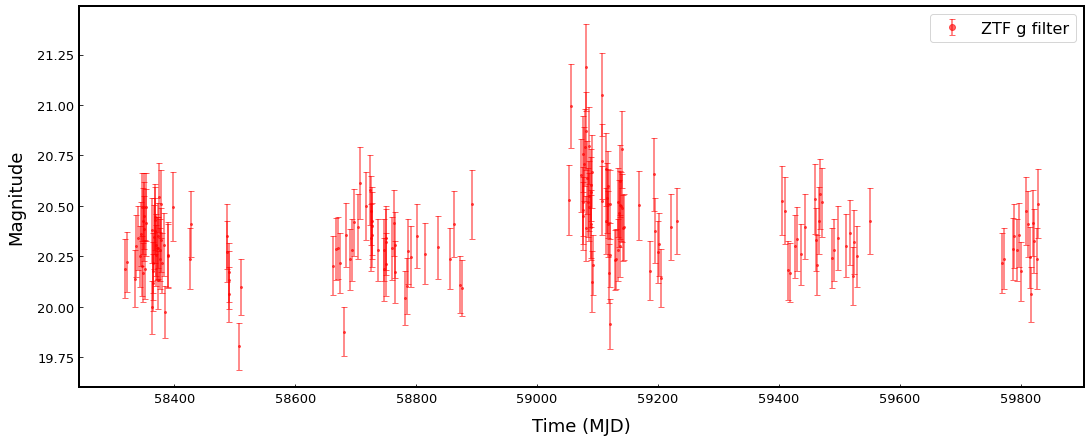

In [12]:
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot()

ax.errorbar(lc['mjd'], lc['mag'], yerr= lc['magerr'], 
            fmt='ro', markersize=2,alpha=0.6,capsize=3, label='ZTF g filter')
ax.set_xlabel('Time (MJD)',fontsize = 18, labelpad=12)
ax.set_ylabel('Magnitude',fontsize = 18,labelpad=12)
ax.tick_params(direction='in', pad = 5, labelsize=13)
ax.legend(fontsize=16, markerscale=3)

# Plot PS1-SDSS-ZTF 

Select an object that has PS1, SDSS, ZTF data. We know that we have the data for all 9258 quasars in Stripe82 from SDSS. We submitted queries for 40 of these to PS1 and ZTF databases. We need to find overlap between all of these, i.e. objects with SDSS, PS1, and ZTF data first. 

In [13]:
# list the clqso candidates
colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
            'f_Edd','Delta(mag)',
            'Delta(sigma_G)', 'MedianPS1']
clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                   names=colnames)

In [28]:
#display first three rows
clqso[:3]

dbID,SDSSJID,ra,dec,Redshift,log10_Lbol,log10_MBH,f_Edd,Delta(mag),Delta(sigma_G),MedianPS1
str9,str18,float64,float64,float64,float64,str4,str5,float64,float64,float64
123909,001626.54+003632.4,4.111,0.609,3.24,46.57,9.47,-1.0,-0.29,-0.054,20.48
8442,001731.70+004910.1,4.382,0.819,2.43,46.61,9.09,-0.58,-0.36,-0.107,20.36
4069419,003359.39+000230.0,8.497,0.042,1.64,45.95,9.05,-1.21,0.22,0.017,20.2


In [14]:
# list all PS1 light curves
ps1 = Table.read('CLQSO_candidates_PS1_DR2.csv', format='csv')

In [38]:
# check how many unique ra values there are  - do we have PS1 data for all 40 clqso?
len(np.unique(ps1['_ra_']))

40

We have PS1 data for all 40 CLQSO candidates - this means that we can plot SDSS-PS1 data for any of these 40 objects.  How about ZTF data? 

In [8]:
def get_ztf_file_list(dr_path):# platform-agnostic solution
    # get the file list 
    filelist = os.listdir(dr_path)
    filelength = []
    for file in filelist:
        filepath = os.path.join(dr_path, file)
        # open the file and count the lines 
        with open(filepath,"r") as f:
            flength =  len(f.readlines())
            # append that length to the file length array 
            filelength.append(flength)
            #print(filepath,flength)

    # select only those that have more than  4 points... 
    file_array = np.array(filelist)
    file_length_array = np.array(filelength)
    N = 4 
    mask = file_length_array > N

    # make a new array selecting only files with more than N lines
    file_array_long = file_array[mask]
    return file_array_long




In [9]:
def count_ztf_r_band(dr_path):
    # get a list of all ZTF light curves
    ztf_all_bands = get_ztf_file_list(dr_path)

    # select only r-band objects
    ztf_r_band = [file for file in ztf_all_bands if file.__contains__('_r.')]
    print(f'There are {len(ztf_r_band)} light curves with ZTF r-band data')


In [10]:
get_ztf_file_list(dr_path)

array(['J203932.41-001818.3_ZTF_g.csv', 'J010812.00-000516.5_ZTF_g.csv',
       'J021259.00-000550.1_ZTF_i.csv', 'J012114.19-010310.8_ZTF_g.csv',
       'J012114.19-010310.8_ZTF_r.csv', 'J010812.00-000516.5_ZTF_r.csv',
       'J203932.41-001818.3_ZTF_r.csv', 'J032825.19-003252.3_ZTF_i.csv',
       'J005142.20+002129.0_ZTF_g.csv', 'J033431.17-000904.0_ZTF_g.csv',
       'J235248.71-001518.4_ZTF_r.csv', 'J235248.71-001518.4_ZTF_g.csv',
       'J033431.17-000904.0_ZTF_r.csv', 'J005142.20+002129.0_ZTF_r.csv',
       'J231032.17-011449.5_ZTF_g.csv', 'J205105.02-005847.5_ZTF_i.csv',
       'J231032.17-011449.5_ZTF_r.csv', 'J205105.02-005847.5_ZTF_g.csv',
       'J005513.15-005621.2_ZTF_r.csv', 'J205105.02-005847.5_ZTF_r.csv',
       'J215015.05-005331.4_ZTF_r.csv', 'J033431.17-000904.0_ZTF_i.csv',
       'J005142.20+002129.0_ZTF_i.csv', 'J215015.05-005331.4_ZTF_g.csv',
       'J235248.71-001518.4_ZTF_i.csv', 'J012114.19-010310.8_ZTF_i.csv',
       'J021259.00-000550.1_ZTF_g.csv', 'J010812.00

In [243]:
# get a list of all ZTF light curves
ztf_all_bands = get_ztf_file_list(dr_path)

# select only r-band objects
ztf_r_band = [file for file in ztf_all_bands if file.__contains__('_r.')]


In [226]:
len(ztf_all_bands)

32

In [227]:
len(ztf_r_band)

12

In [244]:
remove = np.in1d(ztf_all_bands,ztf_r_band,)
ztf_gi_bands = ztf_all_bands[~remove]

In [245]:
sdss_jids_r = [ztf_r_band[N].split('_')[0][1:] for N in range(len(ztf_r_band))]
sdss_jids_gi = [ztf_gi_bands[N].split('_')[0][1:] for N in range(len(ztf_gi_bands))]

In [246]:
sdss_jids_gi = np.unique(sdss_jids_gi)

In [247]:
sdss_jids_r

['012114.19-010310.8',
 '010812.00-000516.5',
 '203932.41-001818.3',
 '235248.71-001518.4',
 '033431.17-000904.0',
 '005142.20+002129.0',
 '231032.17-011449.5',
 '005513.15-005621.2',
 '205105.02-005847.5',
 '215015.05-005331.4',
 '032825.19-003252.3',
 '021259.00-000550.1']

In [248]:
np.in1d(sdss_jids_gi, sdss_jids_r)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

So all objects that have ZTF r, have also ZTF g,i.  

In [149]:
clqso_ztf = Table(data=[sdss_jids], names=['SDSSJID'])

In [218]:
clqso_ztf_gi = Table(data=[sdss_jids_gi], names=['SDSSJID'])

In [249]:
from astropy.table import join
clqso_ztf_join = join(clqso,clqso_ztf,keys='SDSSJID', join_type='inner')
clqso_ztf_gi_join = join(clqso,clqso_ztf_gi,keys='SDSSJID', join_type='right')


How about objects that do not have ZTF data (as a backup)? 

In [250]:
not_in_ztf = ~np.in1d(clqso['SDSSJID'], sdss_jids)
clqso_not_ztf = clqso[not_in_ztf]

In [233]:
fpath = '/Users/chris/GradResearch/2022_CLQSO_follow-up/clqso_not_ztf_list.txt'
clqso_not_ztf[['SDSSJID','ra','dec']].write(fpath, format='csv', overwrite=True)

In [136]:
dr_path = os.path.join(os.getcwd(), 'ZTFDR14')
count_ztf_r_band(dr_path)

There are 12 light curves with ZTF r-band data


In [5]:


def get_data_to_dict(dr_path, N):
    # only a few light curves have ZTF r-band data...
    # make dictionary to store data
    data_r_band = {}
    
    # get a list of all ZTF light curves
    ztf_all_bands = get_ztf_file_list(dr_path)

    # select only r-band objects
    ztf_r_band = [file for file in ztf_all_bands if file.__contains__('_r.')]
    
    # read the ZTF data
    # select N-th light curve 
    ztf_lc = Table.read(os.path.join(dr_path,
                                     ztf_r_band[N]), format='csv')
   
    # store the name of the file for the ZTF 
    data_r_band['ZTF_filename'] = ztf_r_band[N]
    
    # select SDSS data  - the files from SDSS are named 
    # after dbID, need clean dbID
    sdss_jid = ztf_r_band[N].split('_')[0][1:]
    
    # store that JID 
    data_r_band['SDSS_JID'] = sdss_jid
    
    # list the clqso candidates
    colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
                'f_Edd','Delta(mag)',
                'Delta(sigma_G)', 'MedianPS1']
    clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                       names=colnames)

    mask =  clqso['SDSSJID'] == sdss_jid
    clqso_row = clqso[mask]
    sdss_dbid = clqso_row['dbID'][0]
    sdss_dbid_clean = sdss_dbid.split('^')[0] # remove the "^b" part from dbID
    
    # store that identifier
    data_r_band['SDSS_dbID'] = sdss_dbid_clean
    
    # translate ZTF r to synthetic SDSS r 
    path = os.getcwd()
    file_path = os.path.join(path, "DB_QSO_S82.dat.gz")
    
    # we know the column meaning from 
    # https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_DB.html
    colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                       'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
    SDSS_DB_QSO = Table.read(file_path, format='ascii', names = colnames)

    mask = SDSS_DB_QSO['dbID'] == int(sdss_dbid_clean)
    gi = SDSS_DB_QSO[mask]['g'][0]-SDSS_DB_QSO[mask]['i'][0]
    
    # store the original ZTF r-band data just in case,
    # before they get overwritten 
    data_r_band['ztf_original'] = ztf_lc[['mjd','mag','magerr']]
    #r_SDSS_synth = r_ZTF  + 0.01  + 0.04  * gi
    # just overwrite the old value of magnitude
    # with the new value
    
    ztf_lc['mag'] = ztf_lc['mag']+ 0.01  + 0.04  * gi
    data_r_band['ztf_synthetic'] = ztf_lc[['mjd','mag','magerr']]

    # read in the SDSS light curve
    sdss_lc = Table.read(os.path.join('QSO_S82/', sdss_dbid_clean), format='ascii')

    # given the file structure explained in 
    # https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_LC.html
    # rename the relevant columns
    # and do not keep the filter name
    # in the column name,
    # i.e. mag rather than mag_r , 
    # given that for all surveys we are only
    # selecting (for now) data in r-band 
    old_names = ['col7', 'col8', 'col9'] # r-band mjd, mag, magerr are cols 7,8,9
    new_names =  ['mjd', 'mag', 'magerr']
    sdss_lc.rename_columns(old_names, new_names)
    sdss_lc_select = sdss_lc[new_names]

    # -99 means missing data - ignore those
    mask = sdss_lc_select['mag'] > 0
    # store in a dictionary
    data_r_band['sdss'] = sdss_lc_select[mask]

    # add PS1 data 
    # list all PS1 light curves
    ps1 = Table.read('CLQSO_candidates_PS1_DR2.csv', format='csv')

    # select only  rows for that object
    mask_object = ps1['_ra_'] == clqso_row['ra'][0]

    # plot the light curve in r-band 
    mask_filter = ps1['filterID'] == 2 

    # combine the masks
    mask_ps1 = mask_object * mask_filter
    ps1_select = ps1[mask_ps1]['_ra_', '_dec_', 'obsTime', 'nr', 'psfFlux', 'psfFluxErr']

    # calculate AB magnitudes
    ps1_select['mag'] = flux2ab(ps1_select['psfFlux'])
    ps1_select['magerr'] = flux2absigma(ps1_select['psfFlux'], ps1_select['psfFluxErr'])

    # rename obsTime to mjd
    ps1_select.rename_column('obsTime', 'mjd')

    # add to the dictionary
    data_r_band['ps1'] = ps1_select

    # return the dic and the  object name 
    return data_r_band

def plot_combined_data(data, 
                       surveys=['sdss','ps1', 'ztf_synthetic'],
                       labels=['SDSS','PS1','ZTF r-synth']):
    fig, ax = plt.subplots(1,1, figsize=(12,4))
    
    for survey,label in zip(surveys,labels):
        lc = data[survey]
        ax.errorbar(lc['mjd'], lc['mag'], yerr= lc['magerr'], 
                    fmt='o', markersize=2, 
                    alpha=0.6, capsize=3, 
                    label=label
                   )

    #ax.set_ylim(14,22)   
    ax.set_xlabel('Time (MJD)',fontsize = 18, labelpad=12)
    ax.set_ylabel('Magnitude',fontsize = 18,labelpad=12)
    ax.tick_params(direction='in', pad = 5, labelsize=13)
    ax.legend(fontsize=16, markerscale=3, )
    name = data['SDSS_JID']
    ax.set_title(f'Light curve {name} r-band')
    
    # invert y-axis because smaller value of magnitude means brighter object
    ax.invert_yaxis() 
   

Perform day-averaging , similar as https://github.com/suberlak/CRTS_PROJECT/blob/master/A_Fig_1_QSO_CRTS_day_averaged_stats.ipynb  or https://github.com/suberlak/PS1_SDSS_CRTS/blob/master/code2/Combine_PS1_SDSS_ZTF.ipynb 


First, illustrate the effect of day-averaging:

Store the day-averaged light curve... Flag points that depart more than 5-sigma,  and those that have error over 5 times that of the sigmaG of the errors for the entire  light curve (in that survey) ...



In [6]:
def average_data(data, 
                 surveys_to_average=['ps1','ztf_synthetic'],
                Nsigma = 5):
    ''' A quick function to day-average the data. 
    Add to the original data table columns with 
    number of points per day, error-weighted average magnitude,
    average mjd, weighter error, and boolean flag columns indicating
    that a given point has anomalously large (>5sigmaG) departure 
    in magnitude space or in the photometric uncertainty space 
    (using the unaveraged quantities). Methodology of adding an 
    uncertainty floor of 0.02 mag follows Suberlak+2017 
    https://faculty.washington.edu/ivezic/Publications/Suberlak2017.pdf 
    
    Parameters:
    -----------
    data : a dictionary containing light-curve data for 
    each survey, with each data[survey] including 
    mjd, mag, magerr
    surveys_to_average : names of surveys to average, 
    assumed to be the keys of data dictionary 
    Nsigma: float, multiplier of sigmaG that sets the 
        threshold for large departure in magnitude or 
        error distribution
    
    '''
    for survey in surveys_to_average: 

        # select all data points for that light curve 
        mjds = data[survey]['mjd'].data
        mag = data[survey]['mag'].data
        err = data[survey]['magerr'].data

        # find unique days 
        mjd_int = [int(mjd) for mjd in mjds ]

        # count unique days 
        mjd_unique = np.unique(mjd_int)
        n_unique = len(mjd_unique)
        n_total = len(mjd_int)
        print(f'\n{survey}')
        print(f'Unique days:{n_unique} total number of observations: {n_total}')

        # prepare storage arrays 
        n_obs_day = np.zeros_like(mjds)
        avgmjd_ = np.zeros_like(mjds)
        avgmag_ = np.zeros_like(mjds)
        avgerr_ = np.zeros_like(mjds)
        large_error  = np.zeros_like(mjds, dtype=bool)
        large_departure = np.zeros_like(mjds, dtype=bool)


        # flag points that depart more 
        # than 5 sigmaG from mag distribution...
        #Nsig = 5 
        x = mag
        sigmaGmag =  0.7413 * (np.percentile(x,75) -\
                            np.percentile(x,25))
        msig = np.abs(np.ma.median(x) - x) > Nsigma *sigmaGmag
        large_departure =  msig

        # flag points that have error more than 
        # 5*sigmaG from the median of  error distribution...
        x  = err
        sigmaGerr =  0.7413 * (np.percentile(x,75) -\
                             np.percentile(x,25))
        merr = np.abs(np.ma.median(x) - x)   > Nsigma *  sigmaGerr
        large_error = merr
        
        # perform day-averaging 
        # iterate over all days
        for i in range(n_unique):
            # select points from a given day 
            mjd_day = mjd_unique[i]
            mask = mjd_int == mjd_day

            # count points and store
            n_points = np.sum(mask)
            n_obs_day[mask] = n_points

            # select points and plot
            mjd_points = np.array(mjds)[mask]
            mag_points = mag[mask]

            # average the selected points...
            # but only if there is more than one point per day
            if n_points>1:
                err_points = err[mask]
                w = 1/(err_points*err_points)
                avgmag = np.average(mag_points, weights = w)       
                avgerr = 1.0 / np.sqrt(np.sum(w))
                avgmjd = np.mean(mjd_points)
                # increase error if too small 
                if avgerr < 0.02 : 
                    avgerr = np.sqrt(avgerr**2.0 + 0.01**2.0)  

                # store the averaged mjd, mag, magerr
                avgmag_[mask] = avgmag
                avgmjd_[mask] = avgmjd
                avgerr_[mask] = avgerr

        # store that information 
        data[survey]['Nday'] = n_obs_day
        data[survey]['avgmjd'] = avgmjd_
        data[survey]['avgmag'] = avgmag_
        data[survey]['avgerr'] =  avgerr_
        data[survey]['large_error']= large_error
        data[survey]['large_departure'] = large_departure
        
        # store the value of N sigma that was used to flag the points
        data['Nsigma'] = Nsigma
    # return the updated dictionary 
    return data

In [12]:
def plot_averaged_data(data, 
                       surveys = ['sdss','ps1','ztf_synthetic'], 
                       averaged = ['ps1', 'ztf_synthetic'],
                       labels = {'sdss':'SDSS',
                                'ps1':'PS1',
                                'ztf_synthetic':'ZTF r-synth'},
                       colors = {'sdss':'#1f77b4',
                                 'ps1':'#2ca02c', 
                                 'ztf_synthetic':'#9467bd'},
                       plot_flagged = True,
                       suffix = ''
                      ):
    ''' A function to plot the day-averaged data
    
    Parameters:
    ----------
    data: a dictionary with keys corresponding to the surveys to plot 
    surveys: a list of surveys to plot
    labels: dict of labels to use for each survey 
    averaged: which surveys were day-averaged
    colors: dict of colors to use for plotting 
    plot_flagged: boolean - whether  or not to plot flagged points
    '''

    fig, ax = plt.subplots(1,1, figsize=(12,4), dpi=150)

    # plot SDSS, which was not day-averaged 
    survey='sdss'
    lc = data[survey]
    points = ax.errorbar(lc['mjd'], lc['mag'], yerr= lc['magerr'], 
                fmt='o', markersize=2, 
                alpha=0.6, capsize=3, 
                label=labels[survey],
                color=colors[survey]
               )
    
    for survey in averaged:
        # only plot original if there are no averaged for PS1, ZTF 
        
        # select which points had only one observation per day 
        mask = data[survey]['Nday'] == 1 

        # do not plot flagged points if not needed 
        if not plot_flagged: 
            m1 = data[survey]['large_error'] # True if large error
            m2 = data[survey]['large_departure'] # True if large departure 
            m12 = m1|m2   # logical OR - True if either large error OR large departure 
            mask_flagged  = ~m12 # True only for not flagged points 
            mask = mask &mask_flagged # logical AND
            
        lc = data[survey]
        points = ax.errorbar(lc['mjd'][mask], 
                    lc['mag'][mask], 
                    yerr= lc['magerr'][mask], 
                fmt='o', markersize=2, 
                alpha=0.6, capsize=3, 
                label=labels[survey],
                 color=colors[survey]
              )

        print(f'{survey} single point color is {points[0].get_color()}')

        # select which points  had more than one point per day 
        mask = data[survey]['Nday']>1
        # do not plot flagged points if not needed 
        if not plot_flagged: 
            m1 = data[survey]['large_error'] # True if large error
            m2 = data[survey]['large_departure'] # True if large departure 
            m12 = m1|m2   # logical OR - True if either large error OR large departure 
            mask_flagged  = ~m12 # True only for not flagged points 
            mask = mask & mask_flagged # logical AND
            
        points = ax.errorbar(data[survey]['avgmjd'][mask],
                    data[survey]['avgmag'][mask],
                    data[survey]['avgerr'][mask],
                    fmt=".",  markersize=10, mfc='white', mew=2 , label='',
                            color=colors[survey])
        #print(f'{survey} averaged color is {points[0].get_color()}')
        
        # circle points that have 5sigma departure 
        if plot_flagged:
            # read the Nsigma parameter used for flagging 
            Nsig = data['Nsigma']
            for flag,color,label in zip(['large_error', 'large_departure'],
                                    ['magenta','orange'],
                                    [str(Nsig)+r'$\sigma$ err',
                                     str(Nsig)+r'$\sigma$ mag']):
                mask = data[survey][flag]
                ax.scatter(data[survey]['mjd'][mask],
                            data[survey]['mag'][mask],
                            s=80, facecolors='none', edgecolors=colors[survey], 
                      label='')

    # add title, ticks, labels, etc. 
    ax.set_xlabel('Time (MJD)', fontsize = 18, labelpad=12)
    ax.set_ylabel('Magnitude', fontsize = 18 , labelpad=12)
    ax.tick_params(direction='in', pad = 5, labelsize=13)
    ax.legend(fontsize=16, markerscale=3, )
    name = data['SDSS_JID']
    ax.set_title(f'Light curve {name} r-band')

    # invert y-axis because smaller value of magnitude means brighter object
    ax.invert_yaxis() 
    name = data['SDSS_JID'][:5]
    
    if plot_flagged:
        suffix = 'with_flagged'
    fname = f'sdss_ztf_ps1_{name}_combined_{suffix}.png'
    plt.savefig(fname, bbox_inches='tight',
               transparent=False,facecolor='white',)
    print(f'Saved as {fname} in {os.getcwd()}')

## Compare  ZTF DR13 vs DR14


ps1
Unique days:5 total number of observations: 10

ztf_synthetic
Unique days:257 total number of observations: 349
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_03282_combined_.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code


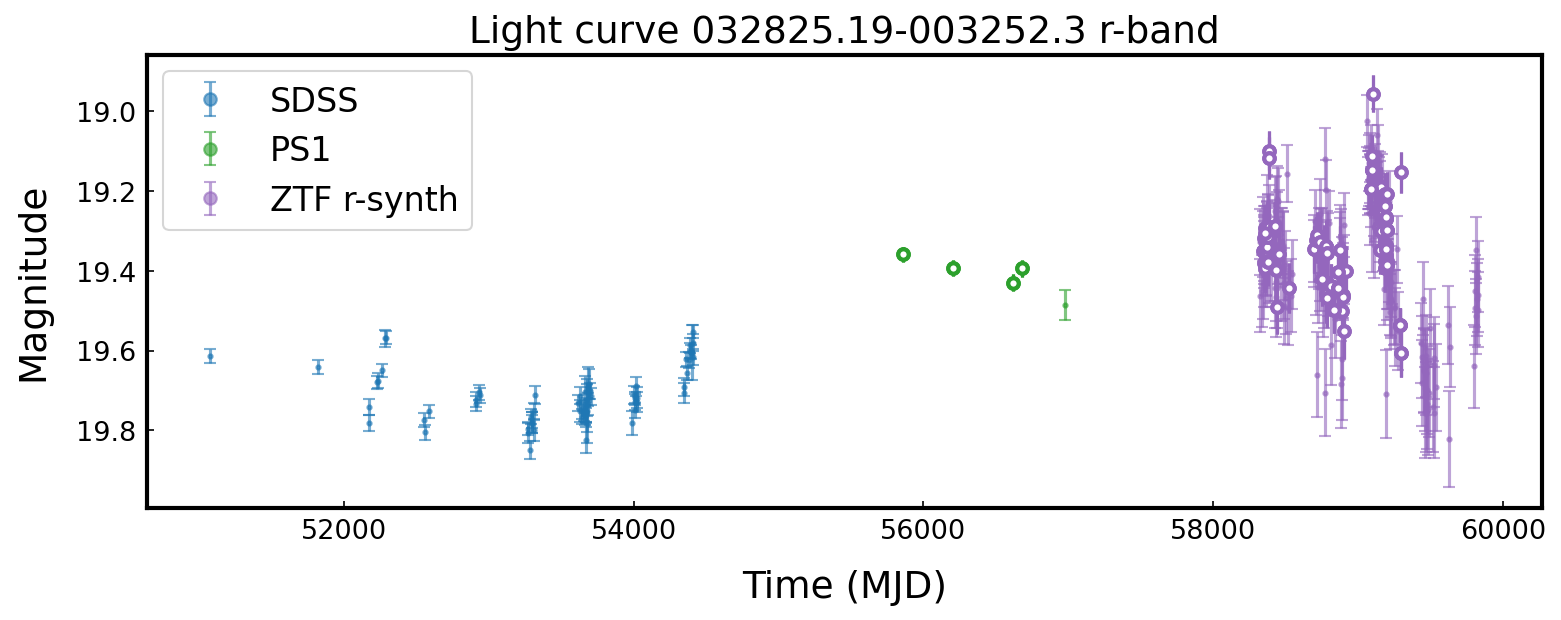

In [13]:
# new: DR 14 
dr_path = os.path.join(os.getcwd(), 'ZTFDR14')
data = get_data_to_dict(dr_path,N=10)
data = average_data(data, surveys_to_average=['ps1','ztf_synthetic'],Nsigma = 5)
plot_averaged_data(data, plot_flagged=False)


ps1
Unique days:5 total number of observations: 10

ztf_synthetic
Unique days:245 total number of observations: 330
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_03282_combined_.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code


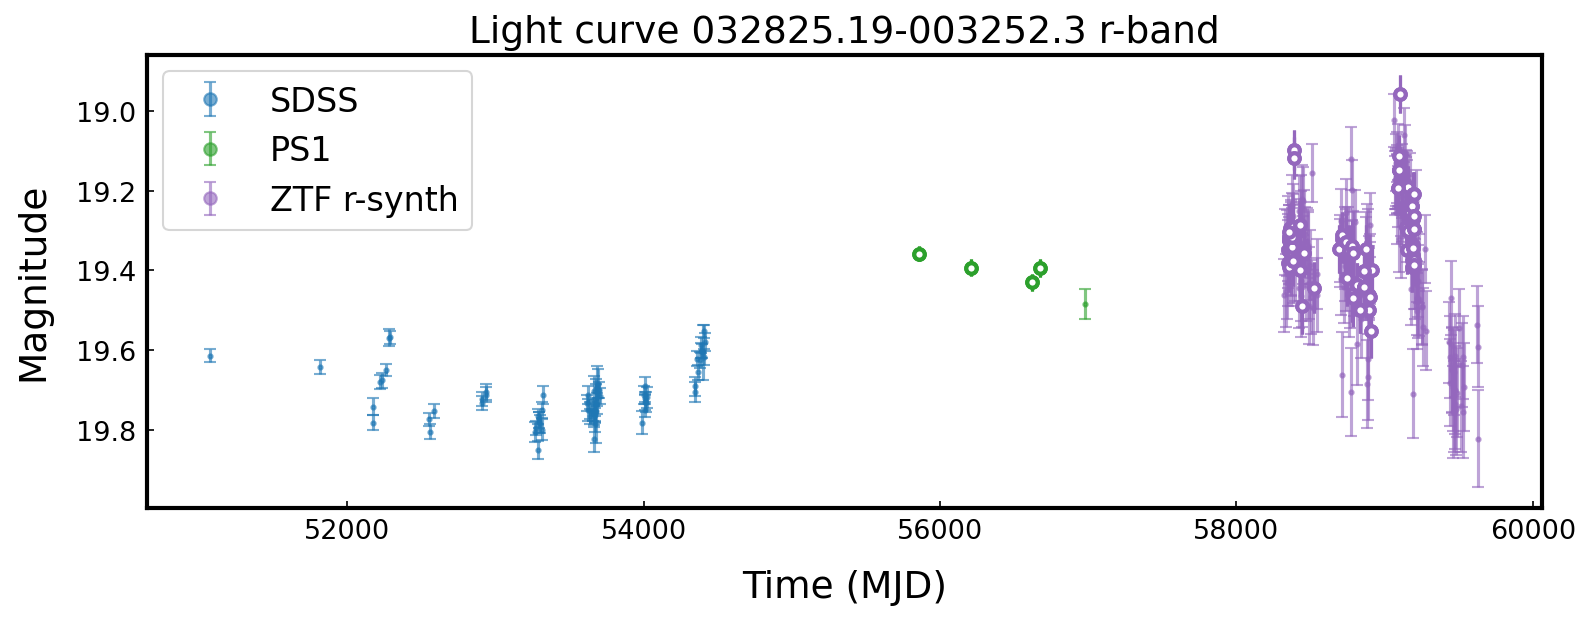

In [14]:
# old: DR13 
dr_path = os.path.join(os.getcwd(), 'ZTF')
data = get_data_to_dict(dr_path, N=10)
data = average_data(data, surveys_to_average=['ps1','ztf_synthetic'],Nsigma = 5)
plot_averaged_data(data, plot_flagged=False)


ps1
Unique days:10 total number of observations: 20

ztf_synthetic
Unique days:203 total number of observations: 241
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_01211_combined_DR13.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code

ps1
Unique days:7 total number of observations: 14

ztf_synthetic
Unique days:146 total number of observations: 182
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_01081_combined_DR13.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code

ps1
Unique days:9 total number of observations: 20

ztf_synthetic
Unique days:171 total number of observations: 191
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_20393_combined_DR13.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code

ps1
Unique days:12 total number of observations: 30

ztf_synthetic
Unique days:177 total number of observation

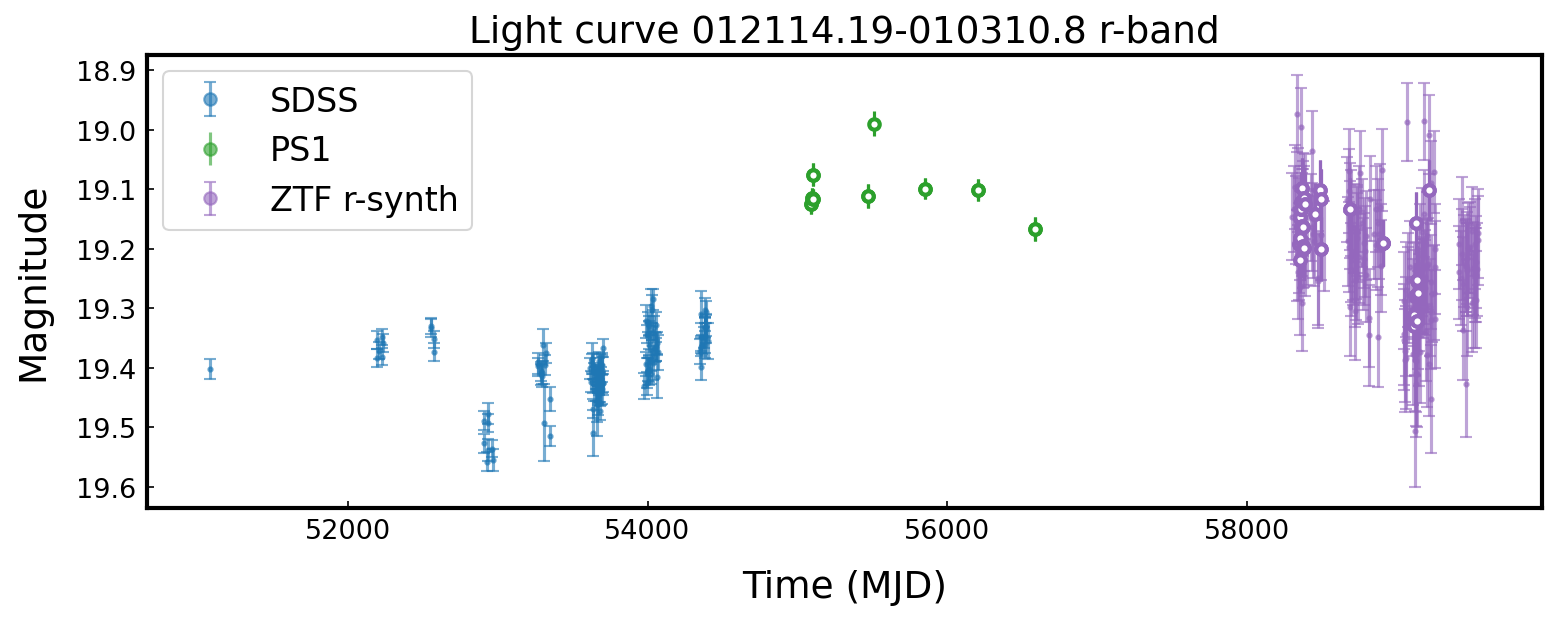

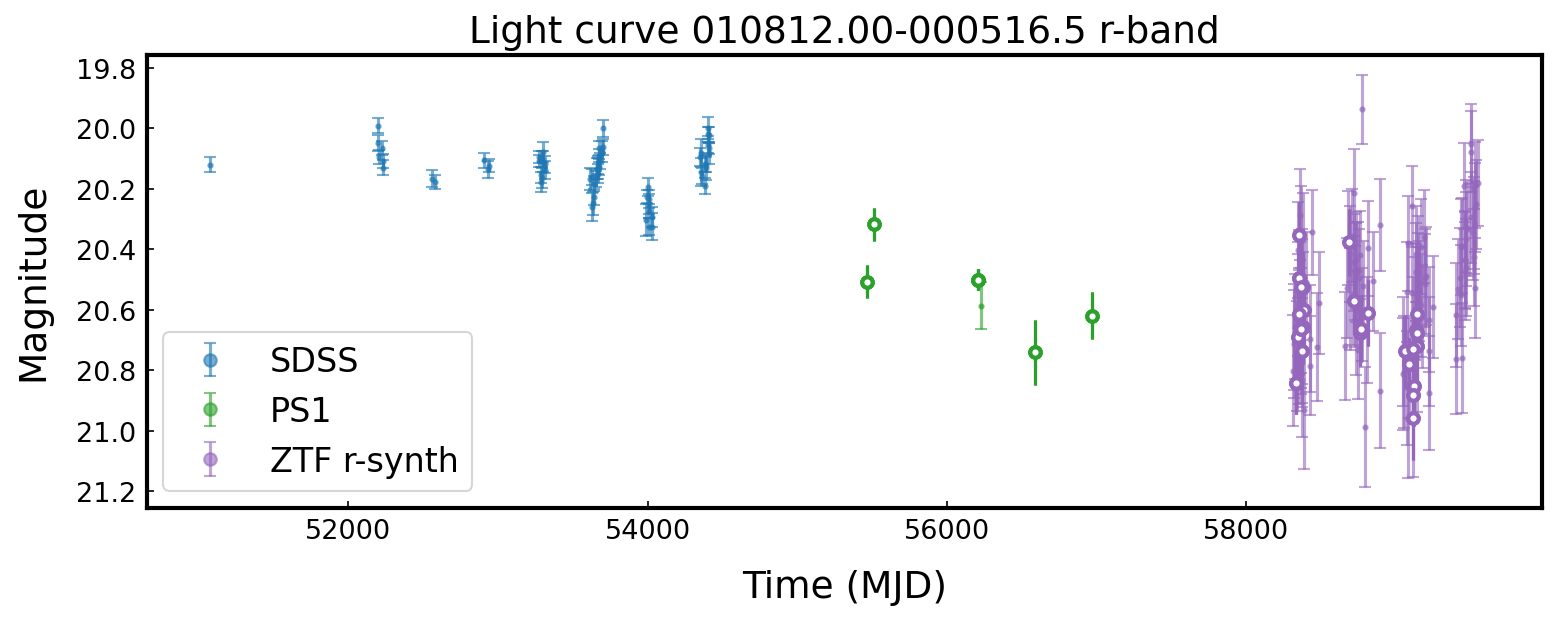

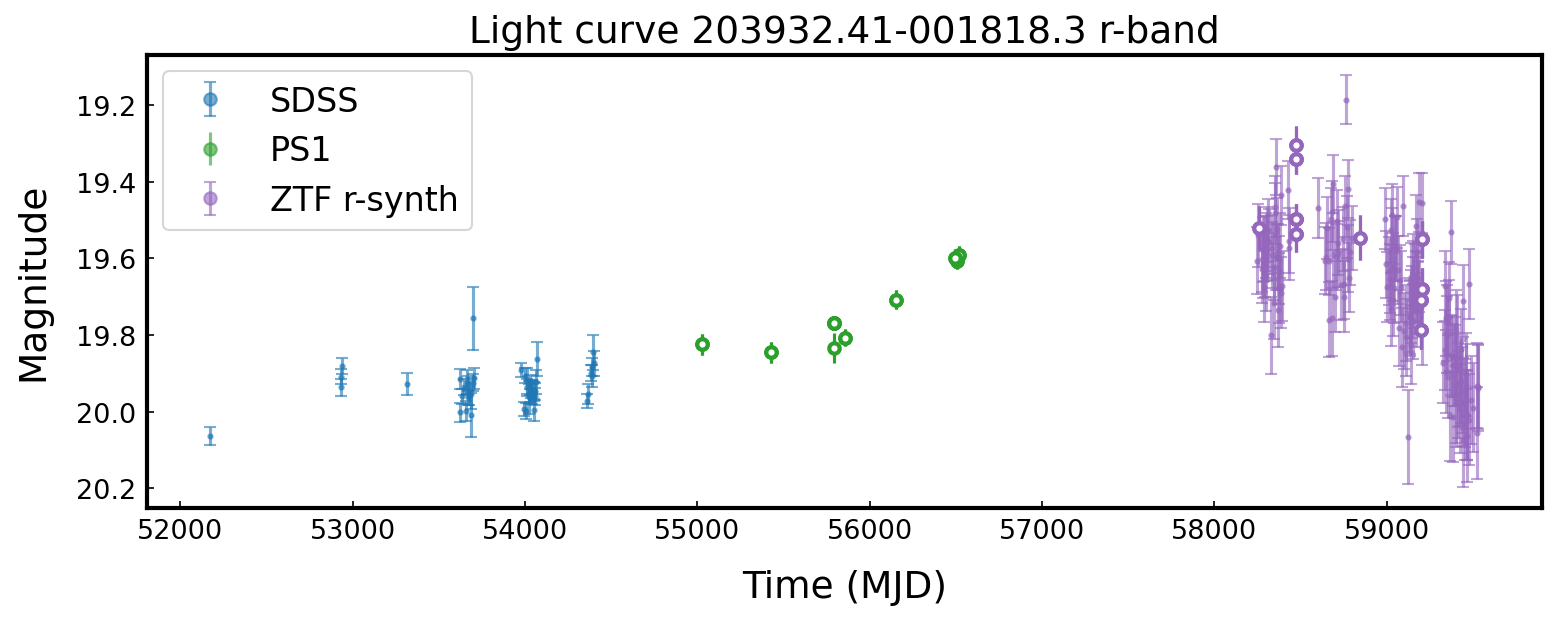

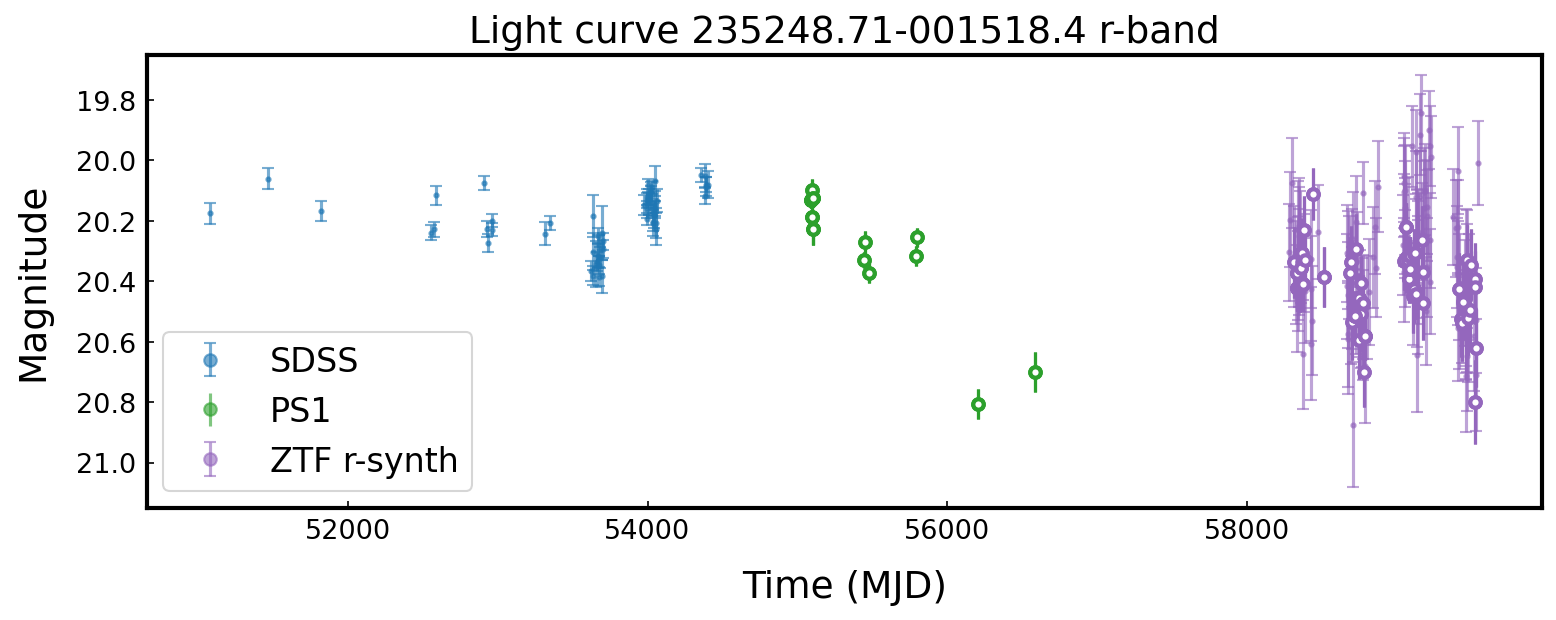

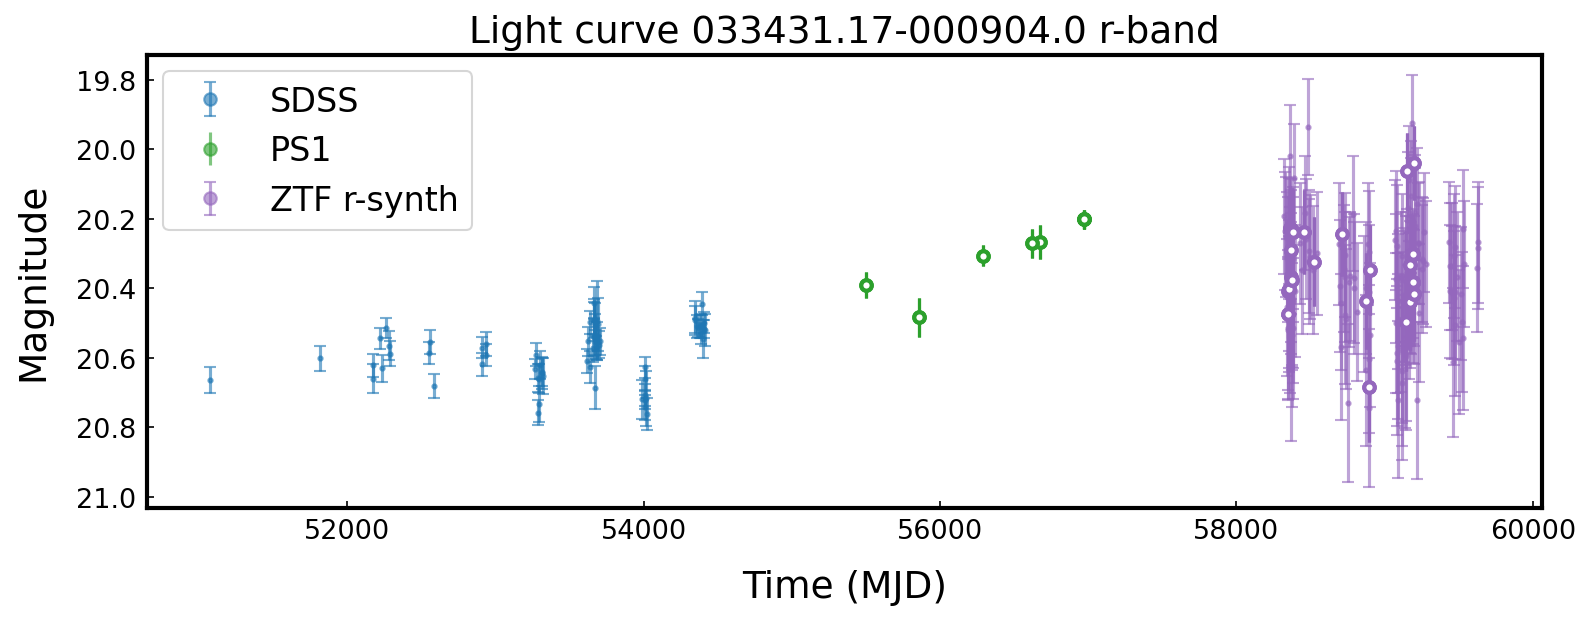

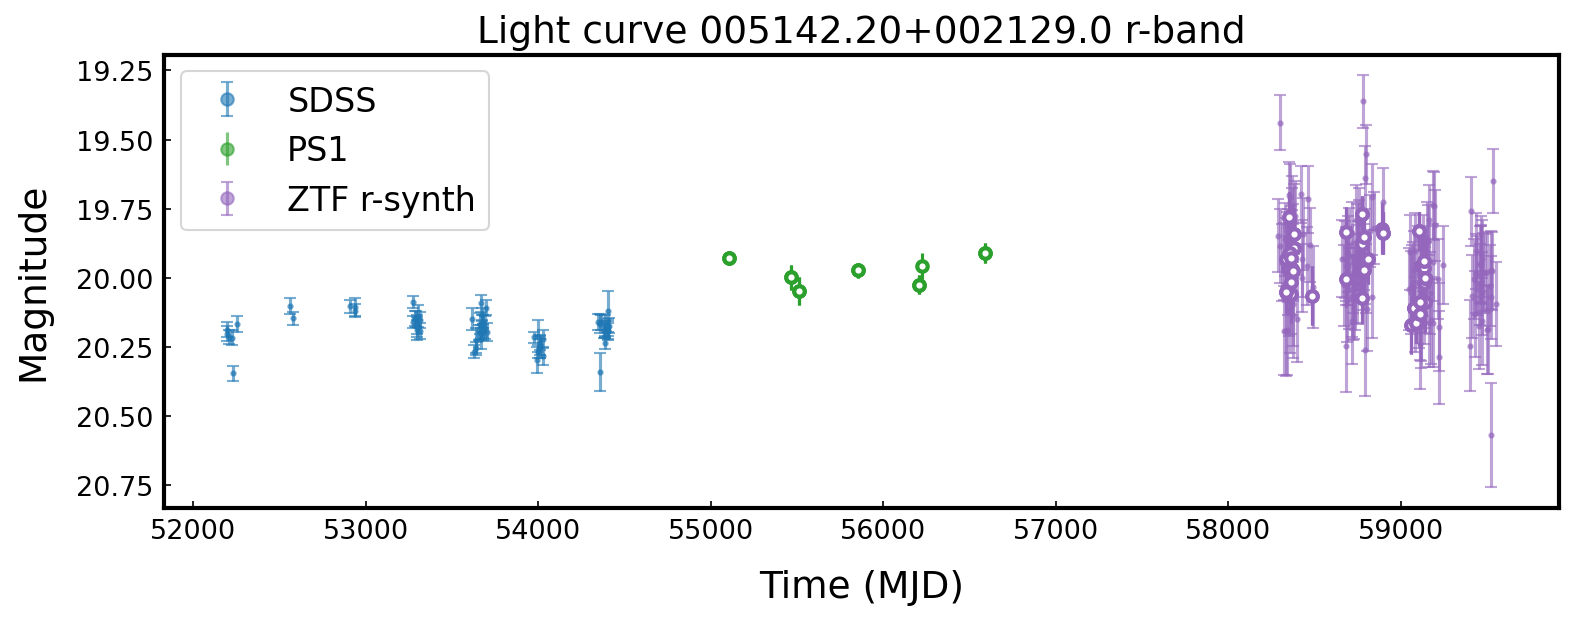

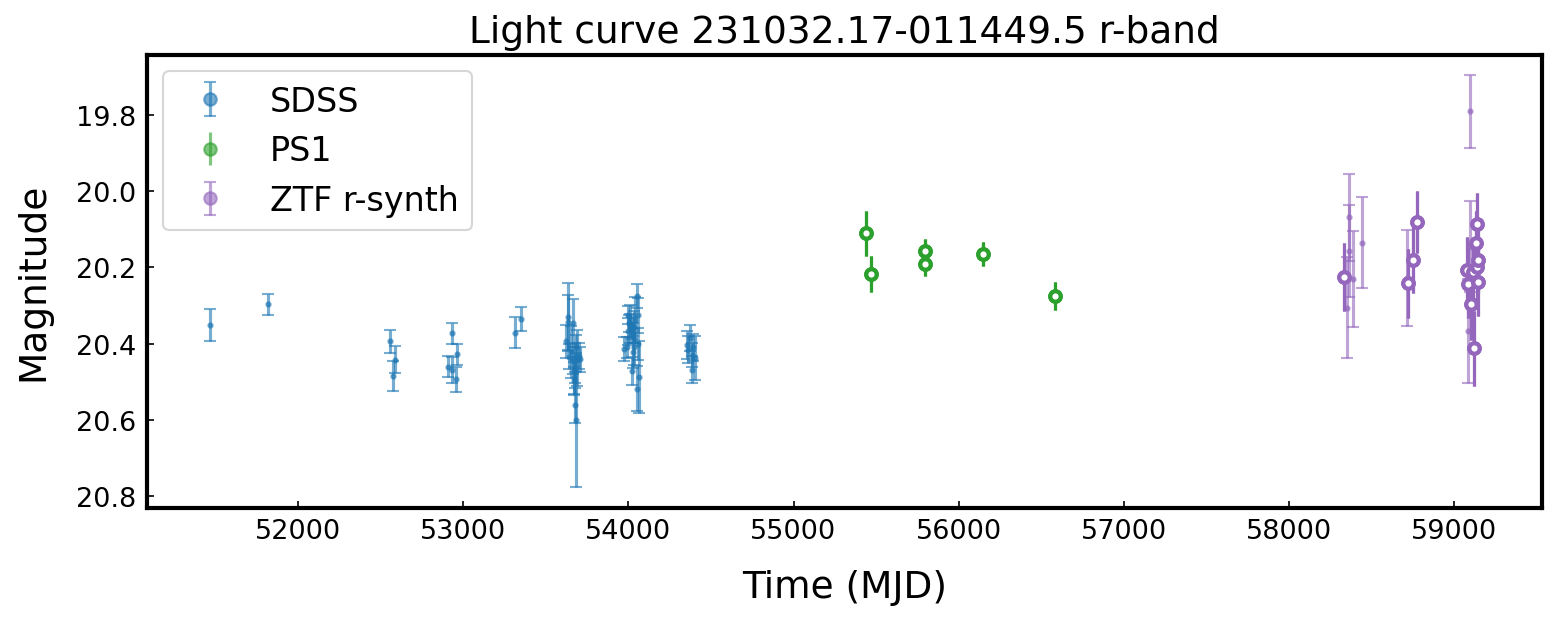

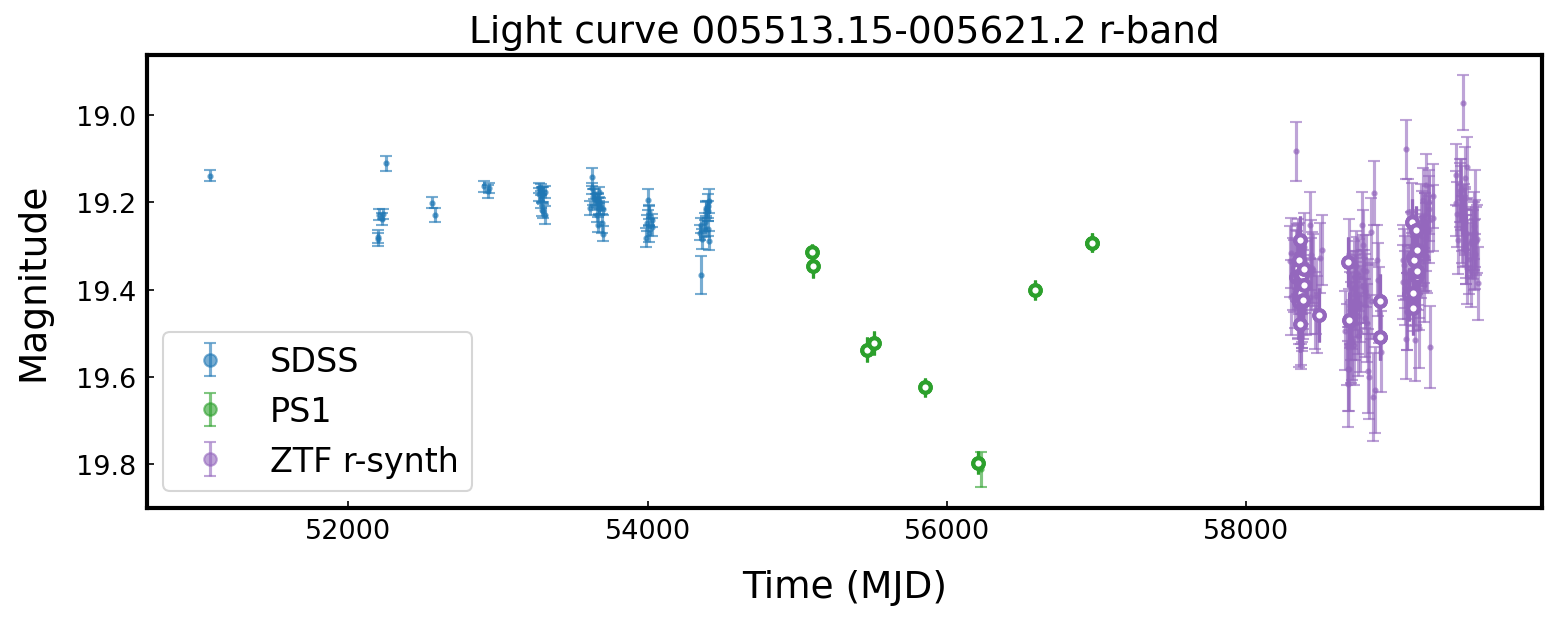

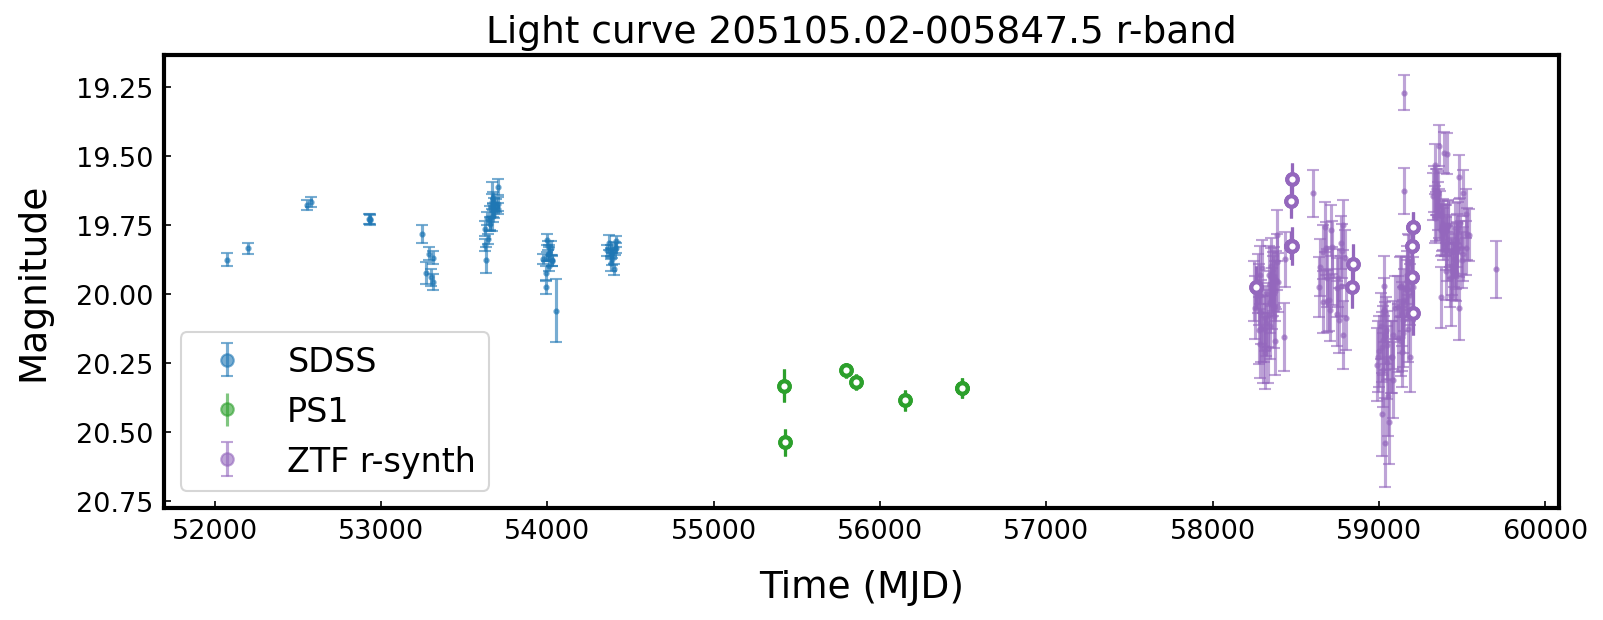

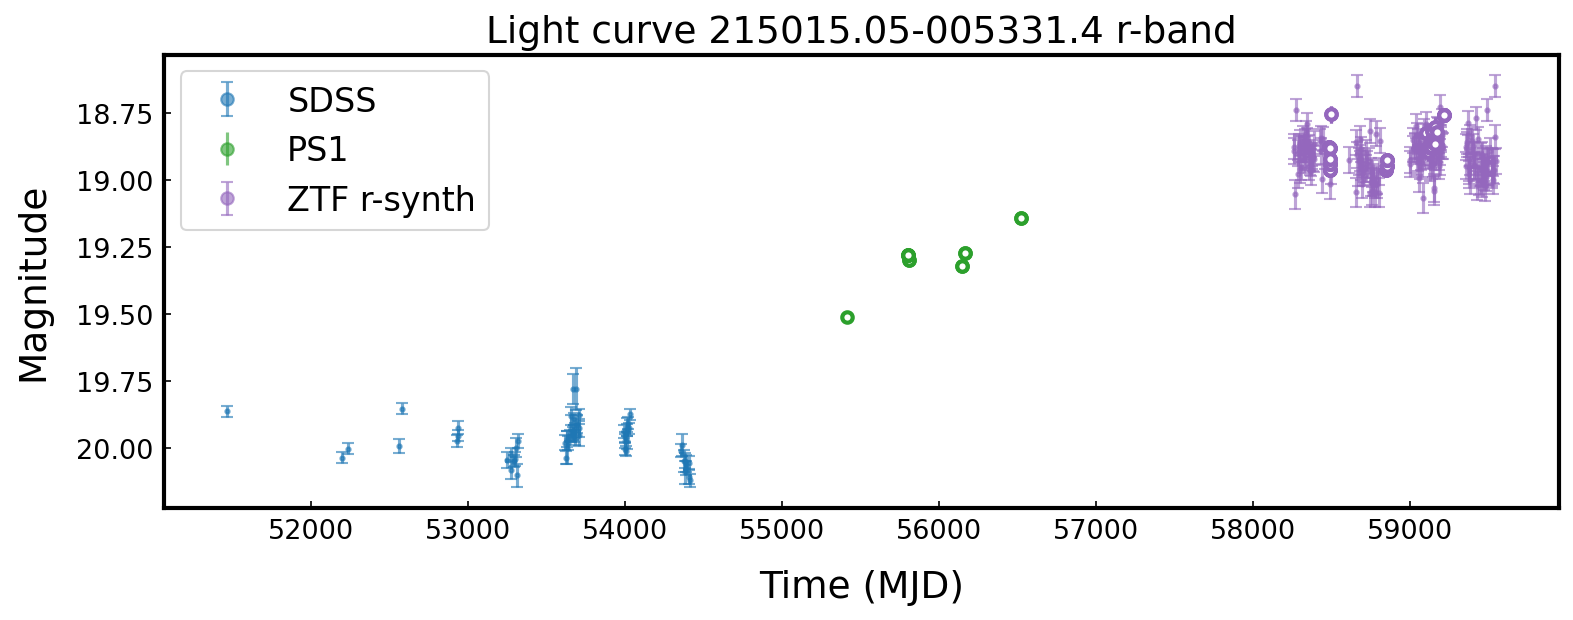

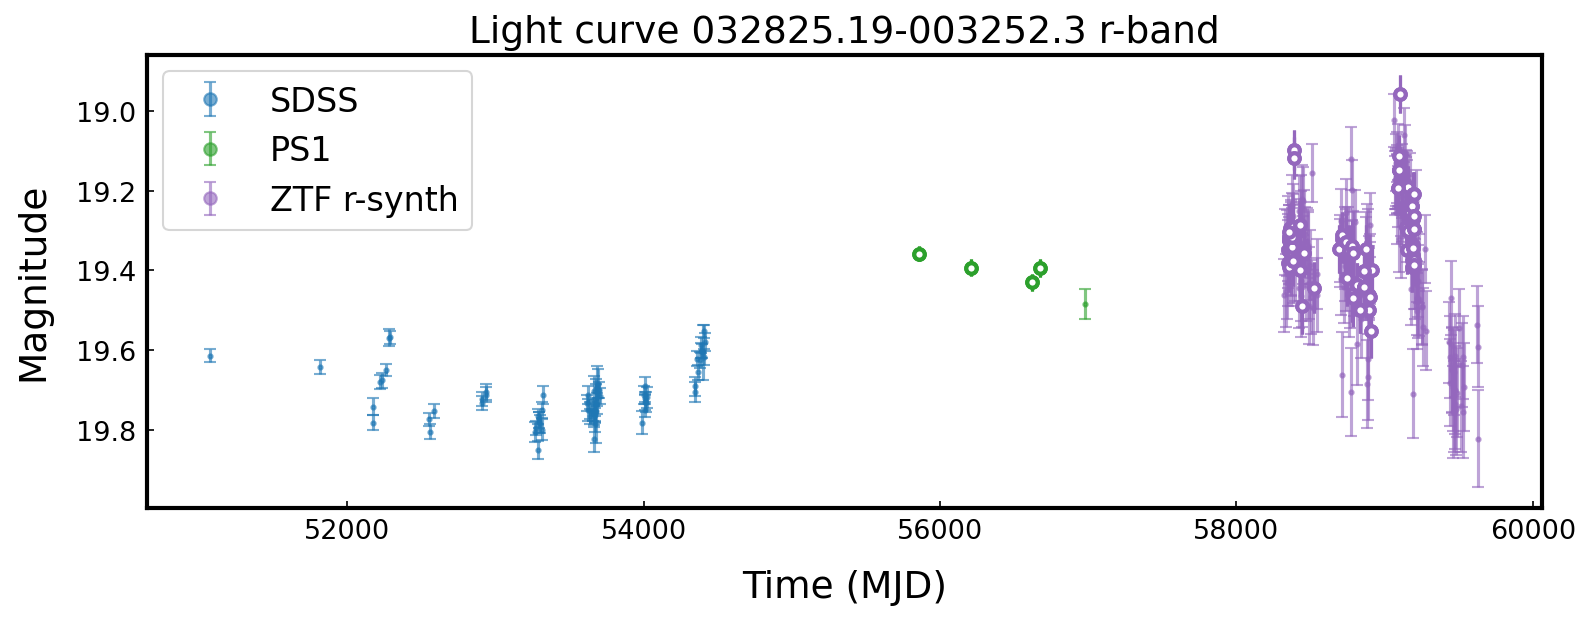

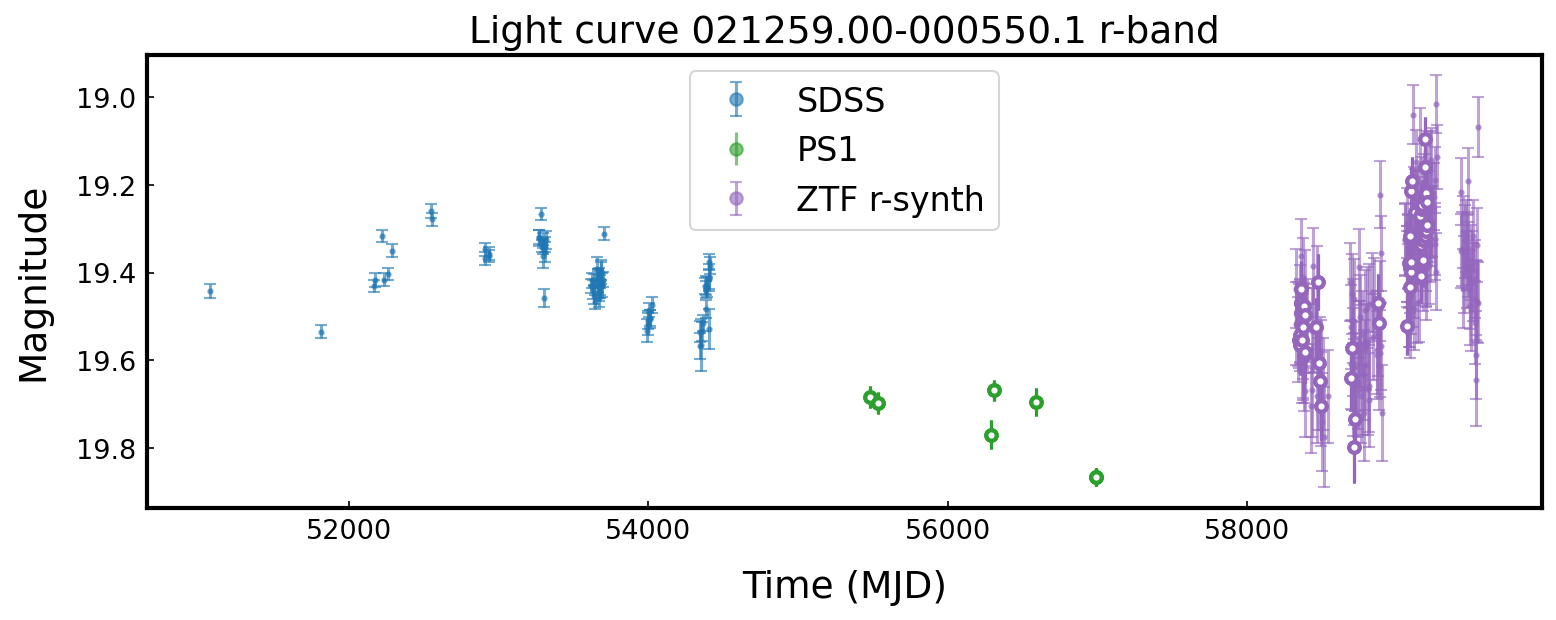

In [33]:
for N in range(12):
    dr_path = os.path.join(os.getcwd(), 'ZTF')
    data = get_data_to_dict(dr_path, N)
    data = average_data(data, surveys_to_average=['ps1','ztf_synthetic'],
                        Nsigma = 5)
    plot_averaged_data(data, plot_flagged=False, suffix='DR13')


ps1
Unique days:10 total number of observations: 20

ztf_synthetic
Unique days:223 total number of observations: 270
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_01211_combined_DR14.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code

ps1
Unique days:7 total number of observations: 14

ztf_synthetic
Unique days:158 total number of observations: 196
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_01081_combined_DR14.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code

ps1
Unique days:9 total number of observations: 20

ztf_synthetic
Unique days:234 total number of observations: 282
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_20393_combined_DR14.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code

ps1
Unique days:12 total number of observations: 30

ztf_synthetic
Unique days:210 total number of observation

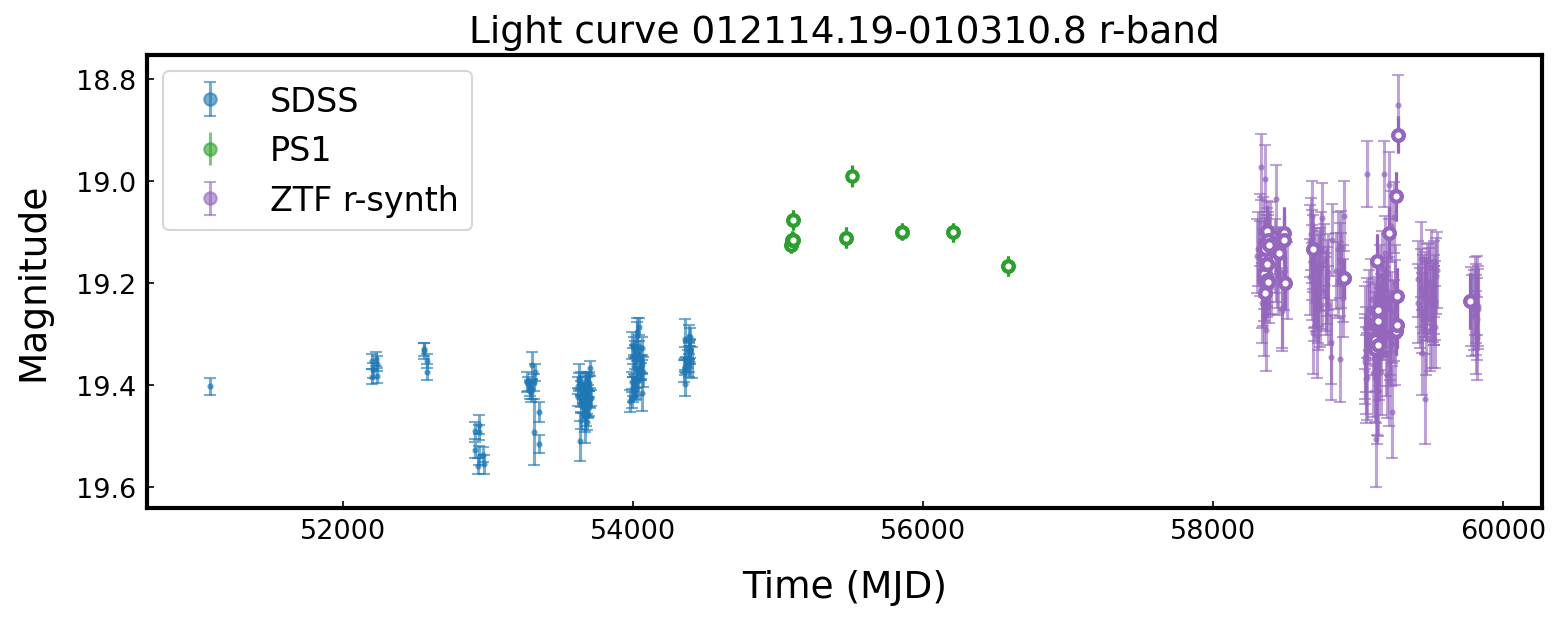

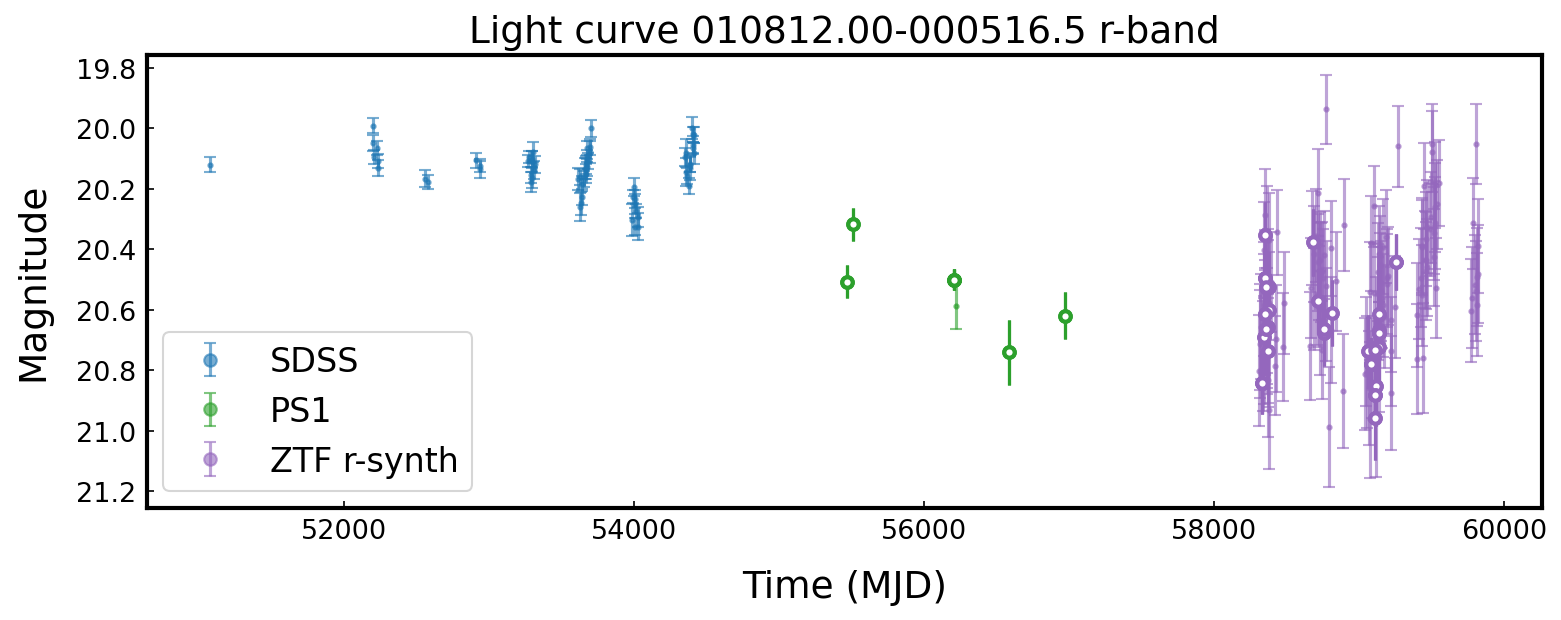

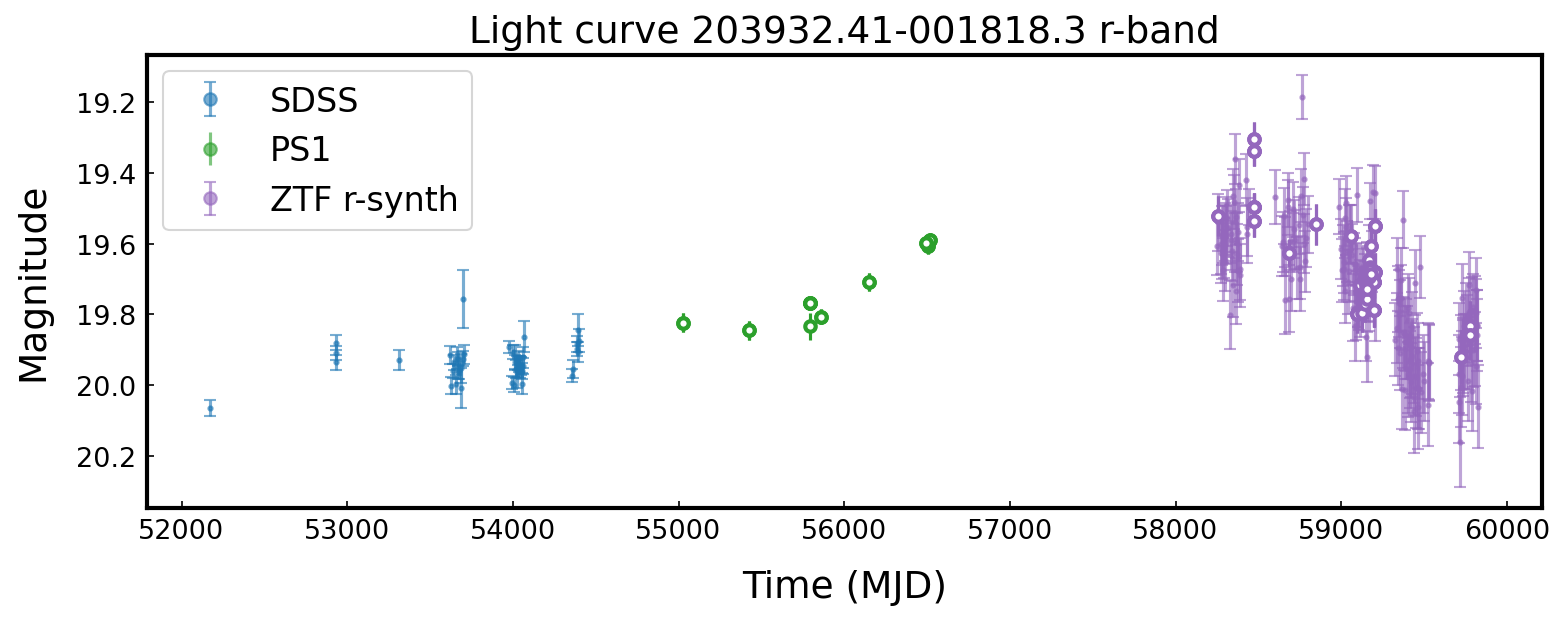

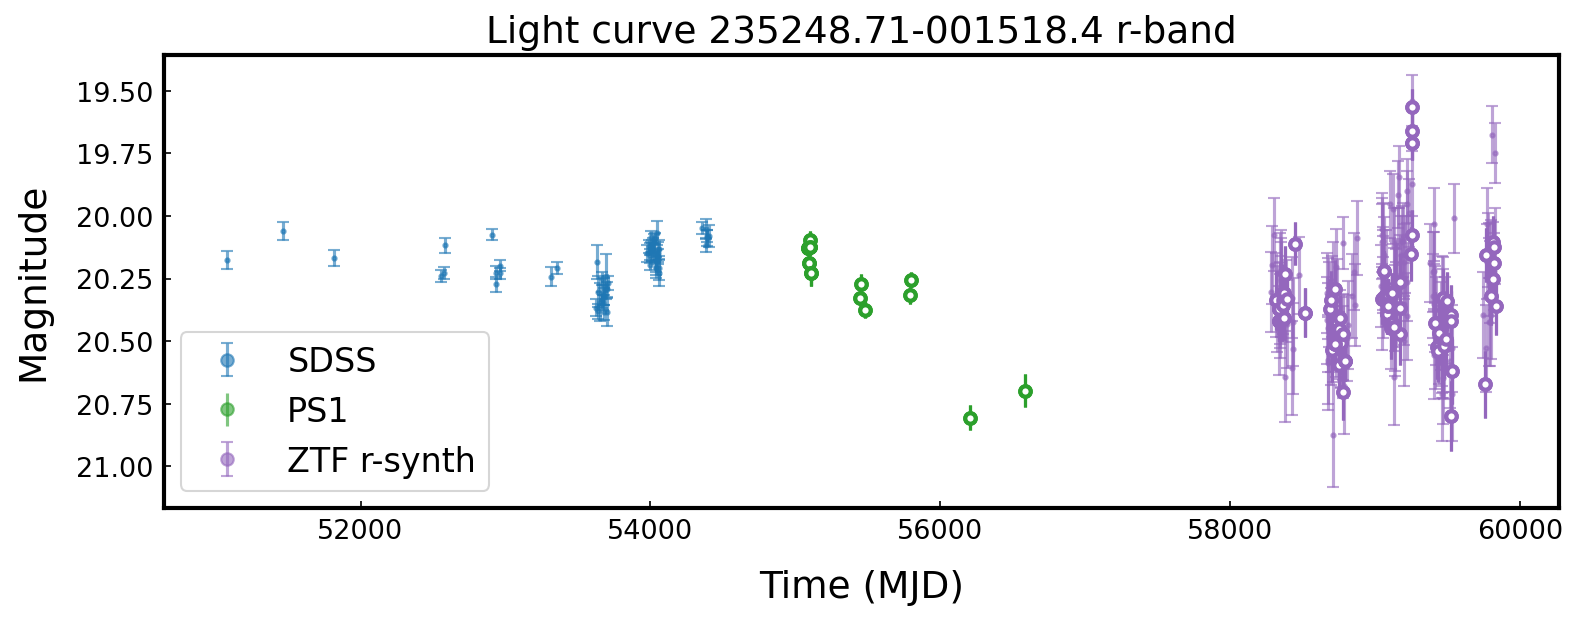

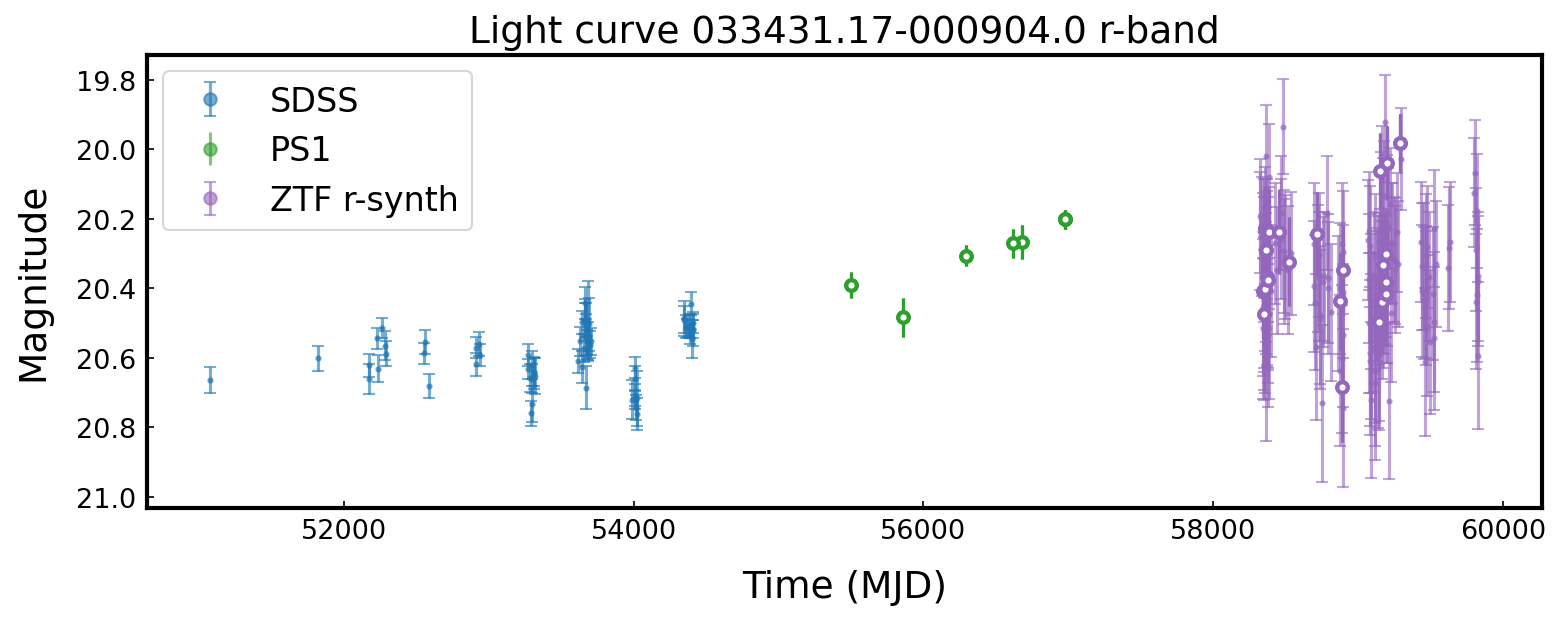

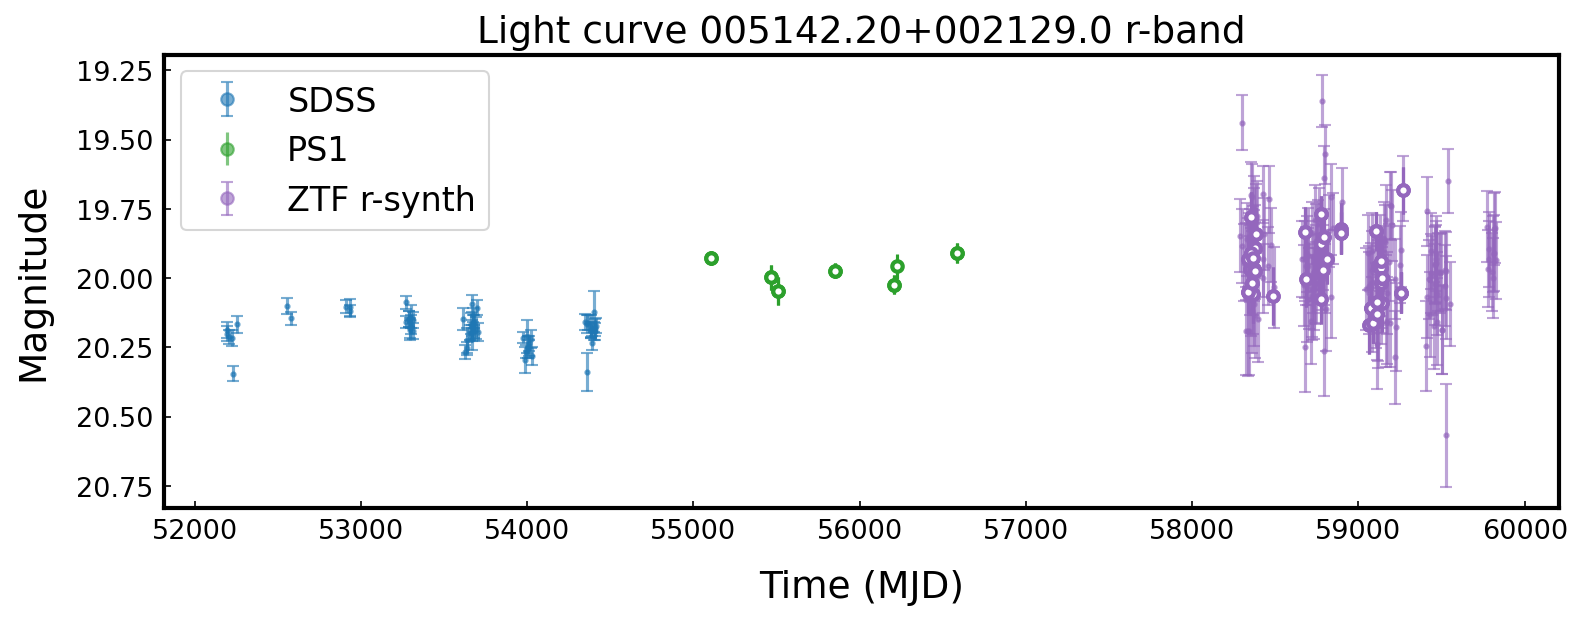

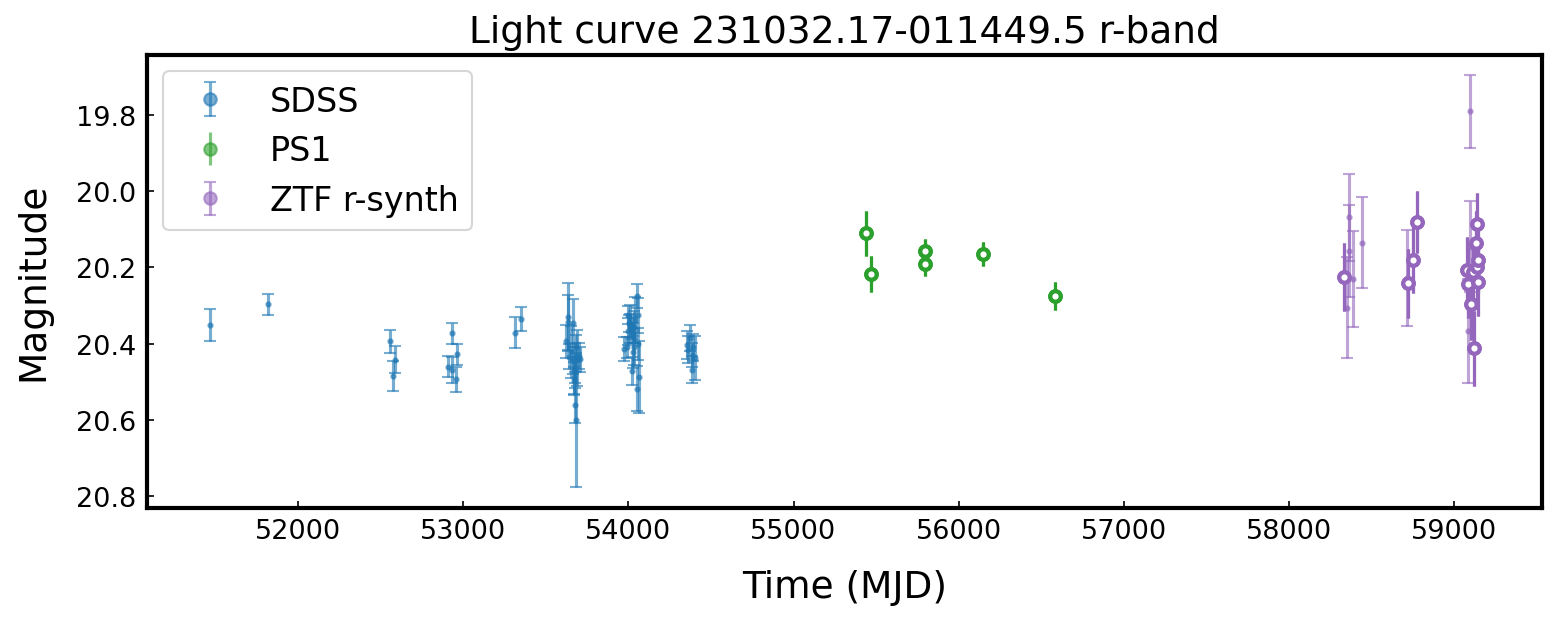

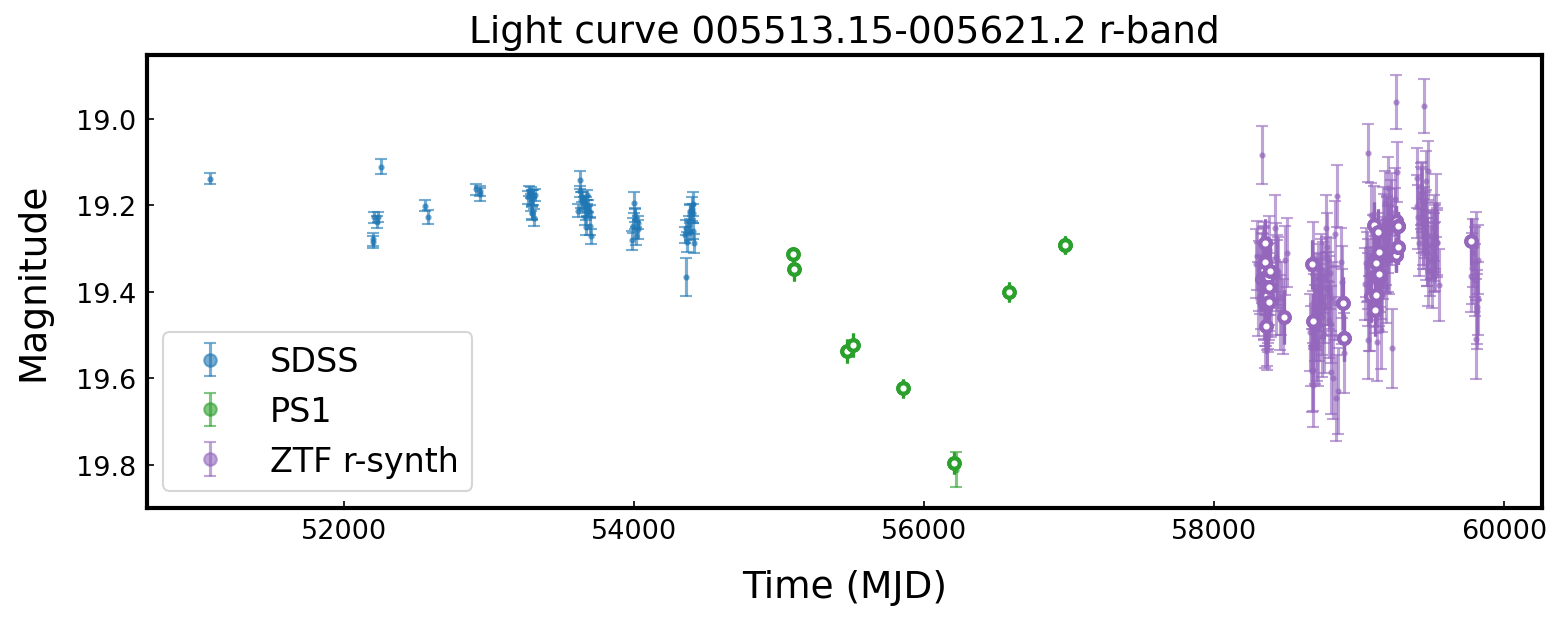

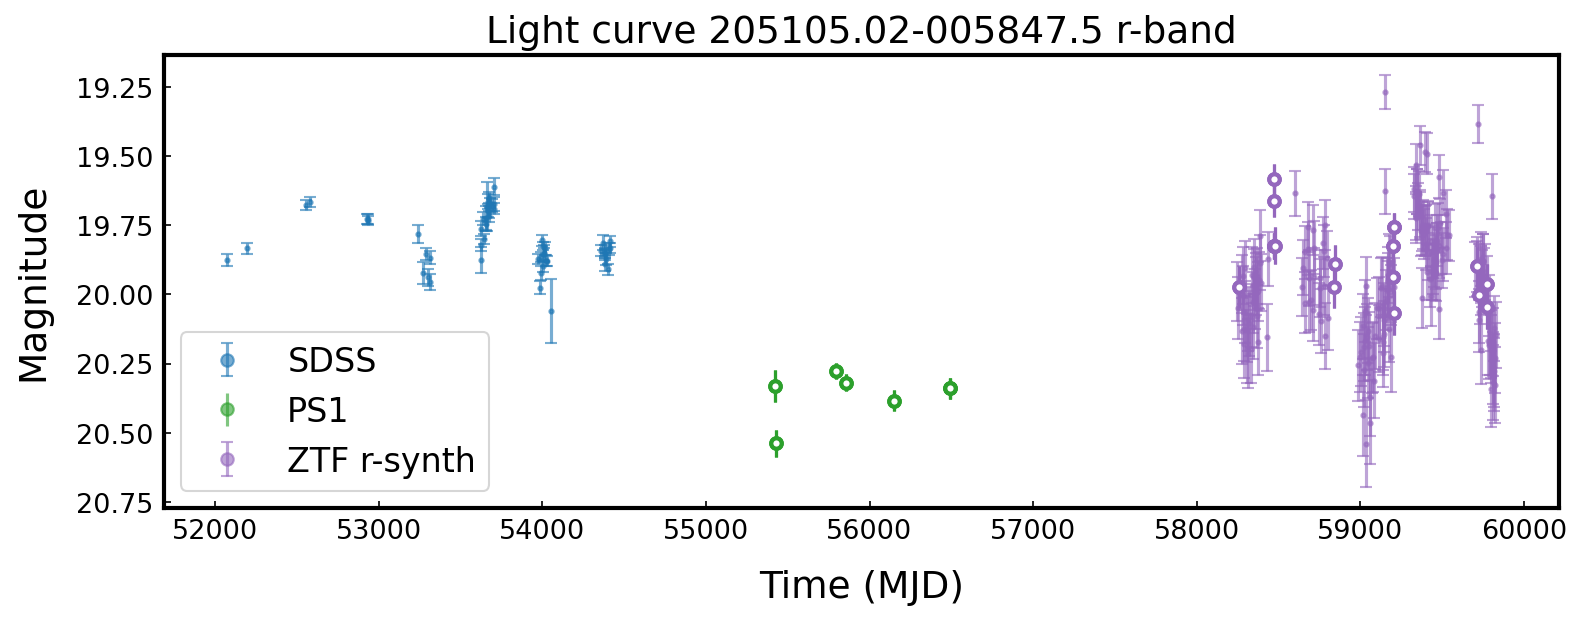

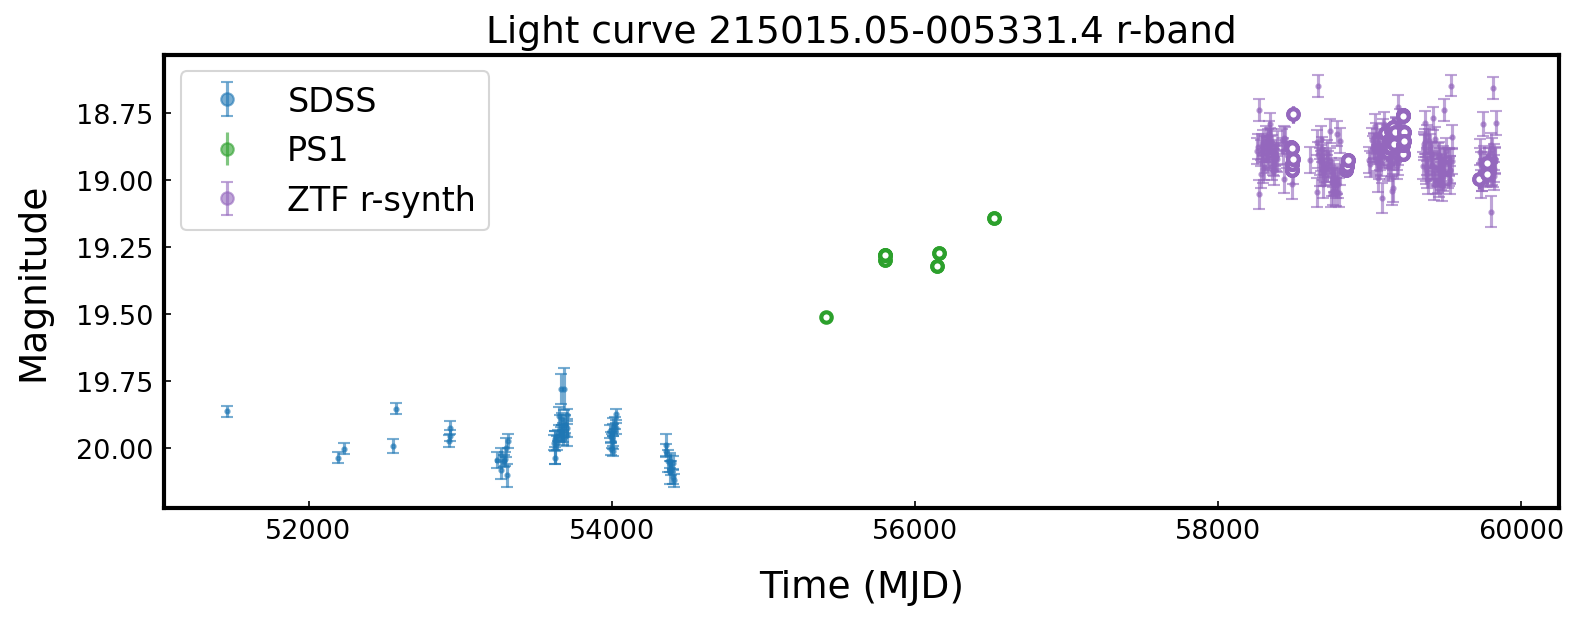

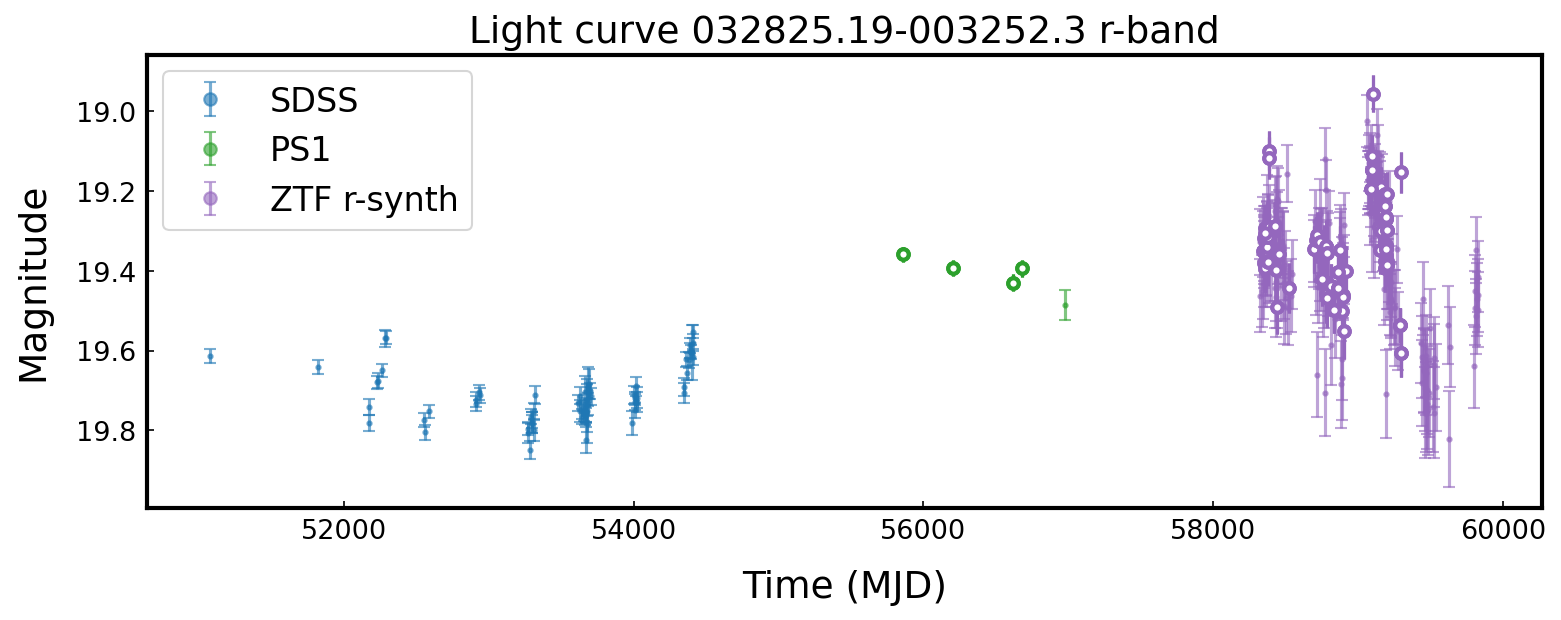

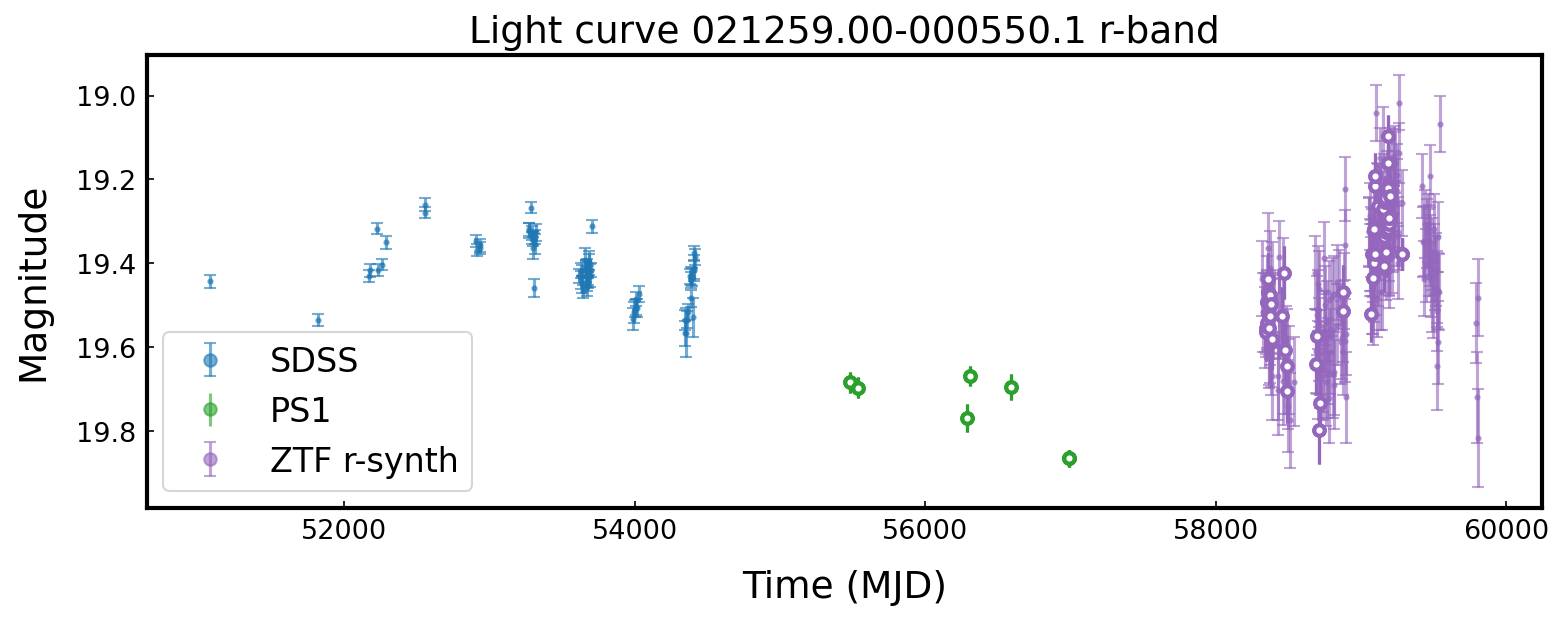

In [15]:
for N in range(12):
    dr_path = os.path.join(os.getcwd(), 'ZTFDR14')
    data = get_data_to_dict(dr_path, N)
    data = average_data(data, surveys_to_average=['ps1','ztf_synthetic'],
                        Nsigma = 5)
    plot_averaged_data(data, plot_flagged=False, suffix='DR14')